In [146]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
import pandas as pd
import numpy as np


In [148]:
data=pd.read_csv("/content/Leads.csv")
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [149]:
column_names = data.columns
column_names

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [150]:
data.shape

(9240, 37)

In [151]:
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [153]:
object_data=data.select_dtypes(include='object',exclude=['number'])
object_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Do Not Email                                   9240 non-null   object
 4   Do Not Call                                    9240 non-null   object
 5   Last Activity                                  9137 non-null   object
 6   Country                                        6779 non-null   object
 7   Specialization                                 7802 non-null   object
 8   How did you hear about X Education             7033 non-null   object
 9   What is your current occupation                6550 non-null   

Step 3: Data Preparation

In [154]:
number_data=data.select_dtypes(include='number',exclude=['object'])
number_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Number                  9240 non-null   int64  
 1   Converted                    9240 non-null   int64  
 2   TotalVisits                  9103 non-null   float64
 3   Total Time Spent on Website  9240 non-null   int64  
 4   Page Views Per Visit         9103 non-null   float64
 5   Asymmetrique Activity Score  5022 non-null   float64
 6   Asymmetrique Profile Score   5022 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 505.4 KB


In [155]:
data.isnull().sum().sort_values(ascending=False)


Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [156]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [157]:
# Checking the summary of the dataset
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [159]:
# Calculate the percentage of null values for each column
null_percentage = (data.isnull().sum() / len(data)) * 100

# Identify columns with more than 30% null values
columns_to_remove = null_percentage[null_percentage > 30].index.tolist()

# Drop columns with more than 30% null values
cleaned_data = data.drop(columns=columns_to_remove)


In [160]:
# Display a summary of the  columns
print("\nSummary of  Columns:")
for column in cleaned_data:
 print(f"Column: {column}, Null Percentage: {null_percentage[column]:.2f}%")


Summary of  Columns:
Column: Prospect ID, Null Percentage: 0.00%
Column: Lead Number, Null Percentage: 0.00%
Column: Lead Origin, Null Percentage: 0.00%
Column: Lead Source, Null Percentage: 0.39%
Column: Do Not Email, Null Percentage: 0.00%
Column: Do Not Call, Null Percentage: 0.00%
Column: Converted, Null Percentage: 0.00%
Column: TotalVisits, Null Percentage: 1.48%
Column: Total Time Spent on Website, Null Percentage: 0.00%
Column: Page Views Per Visit, Null Percentage: 1.48%
Column: Last Activity, Null Percentage: 1.11%
Column: Country, Null Percentage: 26.63%
Column: Specialization, Null Percentage: 15.56%
Column: How did you hear about X Education, Null Percentage: 23.89%
Column: What is your current occupation, Null Percentage: 29.11%
Column: What matters most to you in choosing a course, Null Percentage: 29.32%
Column: Search, Null Percentage: 0.00%
Column: Magazine, Null Percentage: 0.00%
Column: Newspaper Article, Null Percentage: 0.00%
Column: X Education Forums, Null Perc

In [161]:
cleaned_data.shape

(9240, 31)

In [162]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [163]:
# Checking the number of missing values in each column
cleaned_data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [164]:



# Iterate through all columns and print value counts
for column in cleaned_data.columns:
 print(f"Column: {column}")
 print(cleaned_data[column].value_counts(dropna=False))
 print("\n" + "="*30 + "\n")# Separating each column's output for clarity

Column: Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64


Column: Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64


Column: Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Column: Lead Source
Google               2868
Direct Tra

In [165]:
cleaned_data.shape

(9240, 31)

In [166]:
# Specify the column for which you want to summarize
column_name = 'Lead Origin'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for Lead Origin:

Total unique values: 5
Most common value: Landing Page Submission (Count: 4886)
Least common value: Quick Add Form (Count: 1)
Total missing values: 0

Value Counts:
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

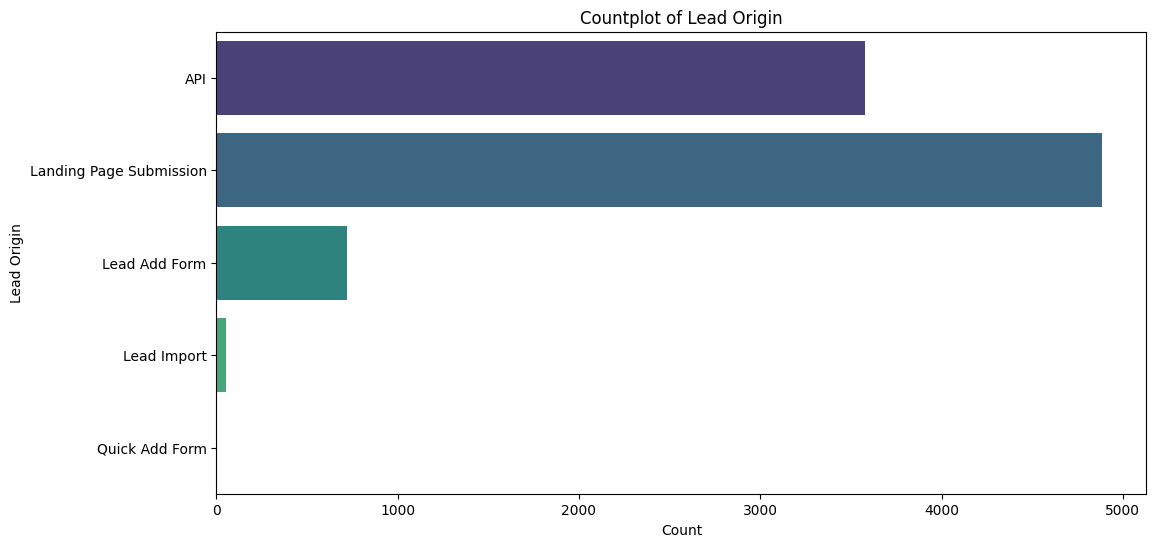

In [168]:
column_name = 'Lead Origin'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [169]:
# Specify the column for which you want to summarize
column_name = 'What matters most to you in choosing a course'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for What matters most to you in choosing a course:

Total unique values: 4
Most common value: Better Career Prospects (Count: 6528)
Least common value: Other (Count: 1)
Total missing values: 2709

Value Counts:
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


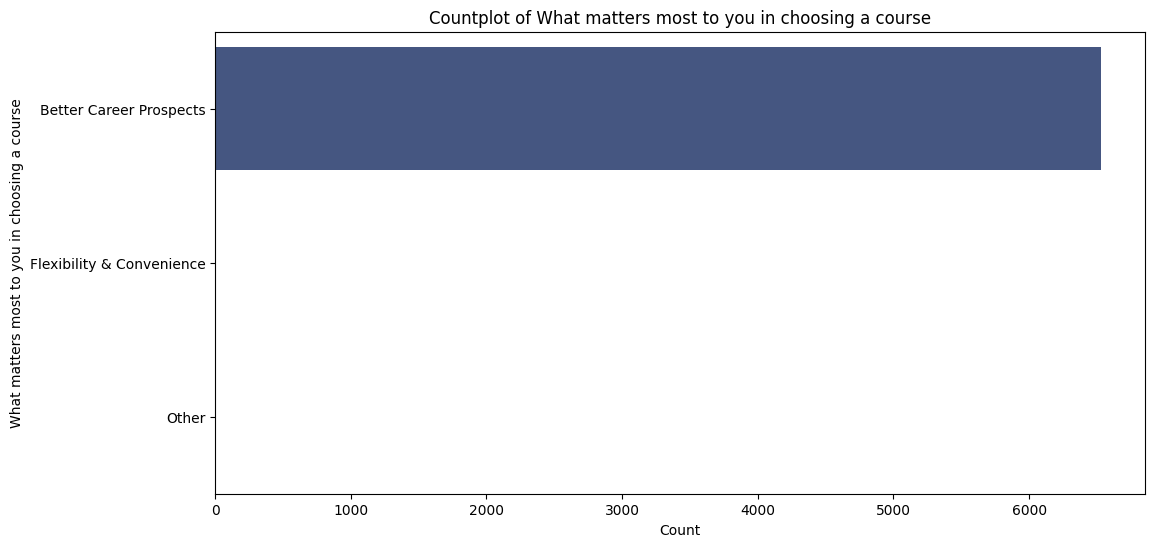

In [170]:
column_name = 'What matters most to you in choosing a course'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [171]:
cleaned_data['What matters most to you in choosing a course'] = cleaned_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


In [172]:
cleaned_data = cleaned_data.drop(columns='What matters most to you in choosing a course', axis=1)

In [173]:
# Checking the number of missing values in each column
cleaned_data.isnull().sum().sort_values(ascending=False)

Lead Profile                                2709
What is your current occupation             2690
Country                                     2461
How did you hear about X Education          2207
Specialization                              1438
City                                        1420
Page Views Per Visit                         137
TotalVisits                                  137
Last Activity                                103
Lead Source                                   36
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply Chain Content              0
Prospect ID                                    0
Newspaper                                      0
Get updates on DM Content                      0
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview         0
Digital Advertisement                          0
Search                                         0
X Education Forums  

In [174]:
# Specify the column for which you want to summarize
column_name = 'What is your current occupation'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for What is your current occupation:

Total unique values: 7
Most common value: Unemployed (Count: 5600)
Least common value: Businessman (Count: 8)
Total missing values: 2690

Value Counts:
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


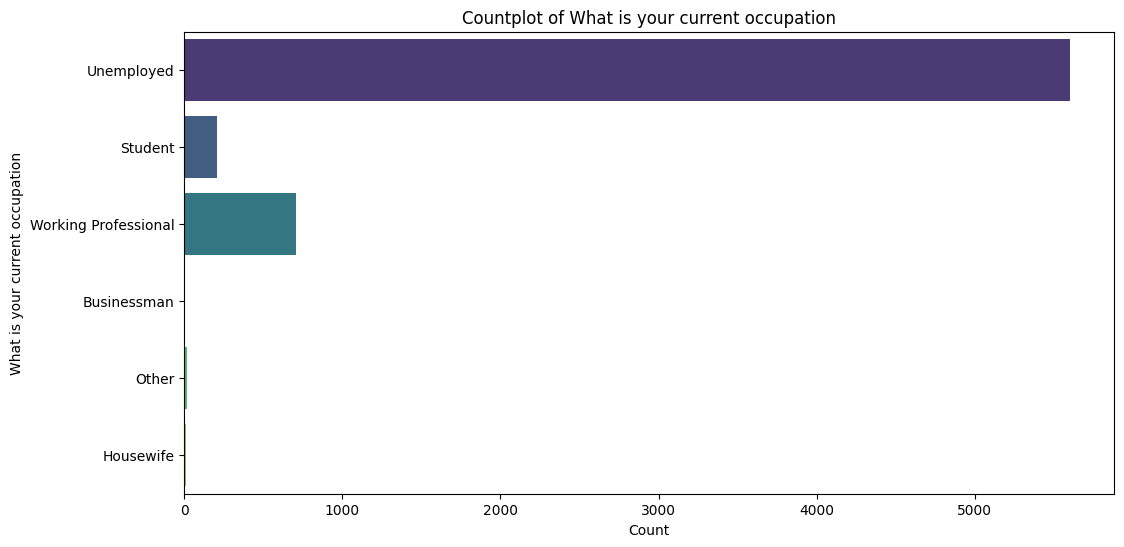

In [175]:
column_name = 'What is your current occupation'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [176]:
cleaned_data['What is your current occupation'] = cleaned_data['What is your current occupation'].replace(np.nan, 'Unemployed')

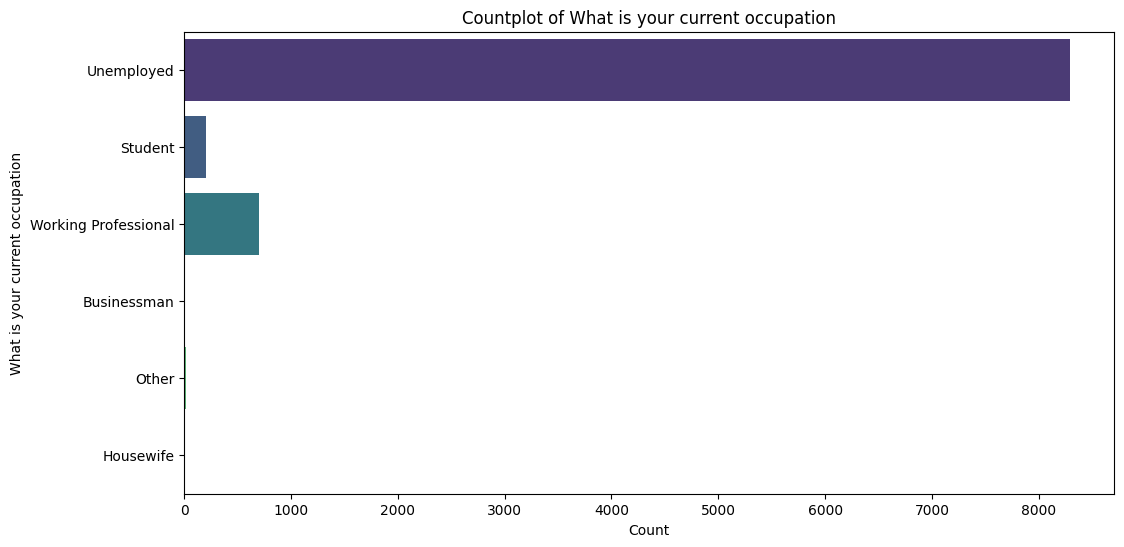

In [177]:
column_name = 'What is your current occupation'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [178]:
# Specify the column for which you want to summarize
column_name = 'Country'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for Country:

Total unique values: 39
Most common value: India (Count: 6492)
Least common value: Kenya (Count: 1)
Total missing values: 2461

Value Counts:
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                   

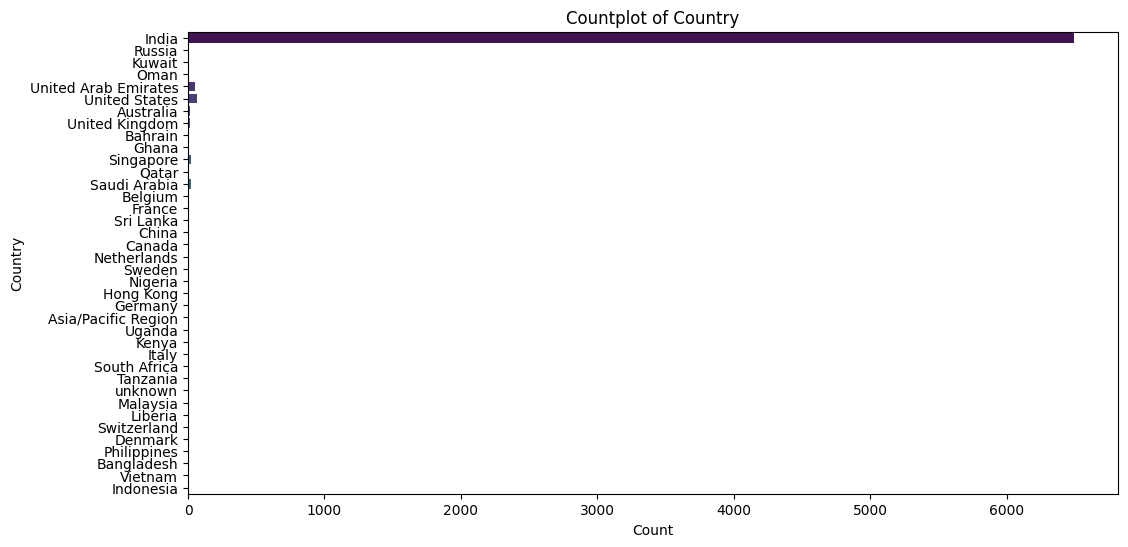

In [179]:
column_name = 'Country'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()



# **1.   as country coloumn india only occupied 97% data so no use of the coloum we are dropping it.**




In [180]:
cleaned_data = cleaned_data.drop(columns='Country',axis=1)

In [181]:
cleaned_data.isnull().sum().sort_values(ascending=False)


Lead Profile                                2709
How did you hear about X Education          2207
Specialization                              1438
City                                        1420
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Prospect ID                                    0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply Chain Content              0
Get updates on DM Content                      0
Newspaper                                      0
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview         0
Digital Advertisement                          0
Search                                         0
X Education Forums                             0
Newspaper Article                              0
Magazine            

In [182]:
# Specify the column for which you want to summarize
column_name = 'How did you hear about X Education'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for How did you hear about X Education:

Total unique values: 11
Most common value: Select (Count: 5043)
Least common value: SMS (Count: 23)
Total missing values: 2207

Value Counts:
Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


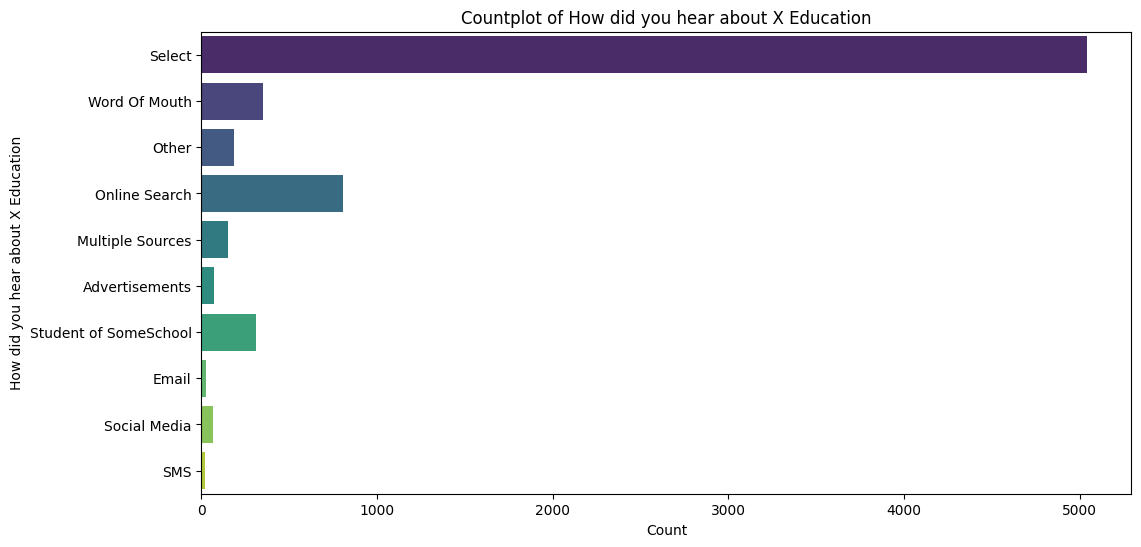

In [183]:
column_name = 'How did you hear about X Education'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [184]:
cleaned_data = cleaned_data.drop(columns= 'How did you hear about X Education',axis=1)

In [185]:
cleaned_data.isnull().sum().sort_values(ascending=False)

Lead Profile                                2709
Specialization                              1438
City                                        1420
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Prospect ID                                    0
Newspaper                                      0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Magazine                                       0
X Education Forums                             0
Newspaper Article                              0
Lead Number                                    0
Search              

In [186]:
# Specify the column for which you want to summarize
column_name = 'Specialization'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for Specialization:

Total unique values: 20
Most common value: Select (Count: 1942)
Least common value: Services Excellence (Count: 40)
Total missing values: 1438

Value Counts:
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excell

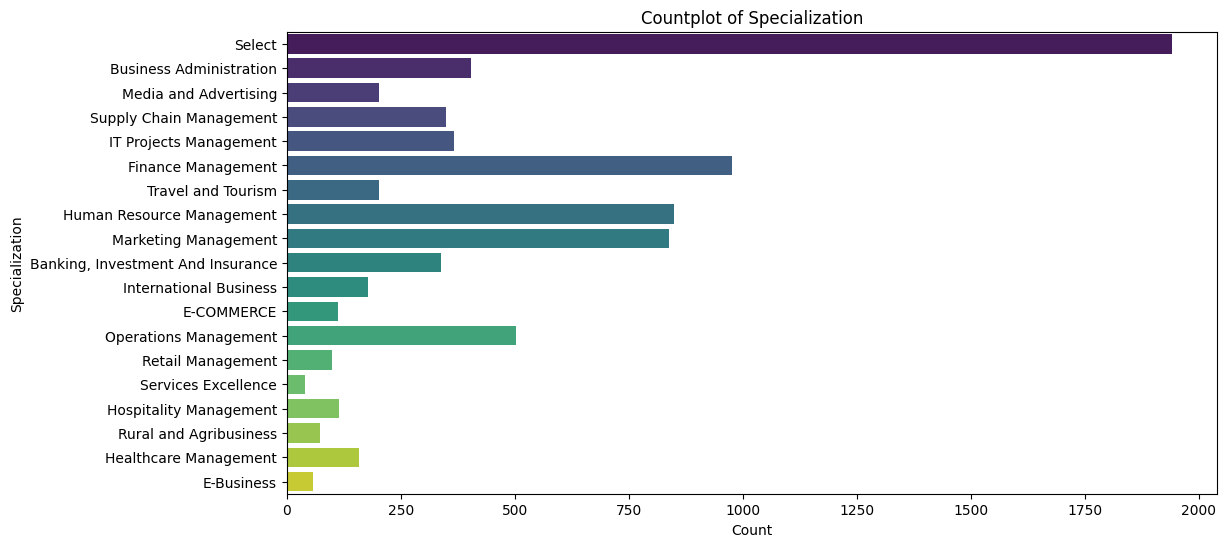

In [187]:
column_name = 'Specialization'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [188]:
cleaned_data['Specialization'] = cleaned_data['Specialization'].replace(np.nan, 'Not Specified')


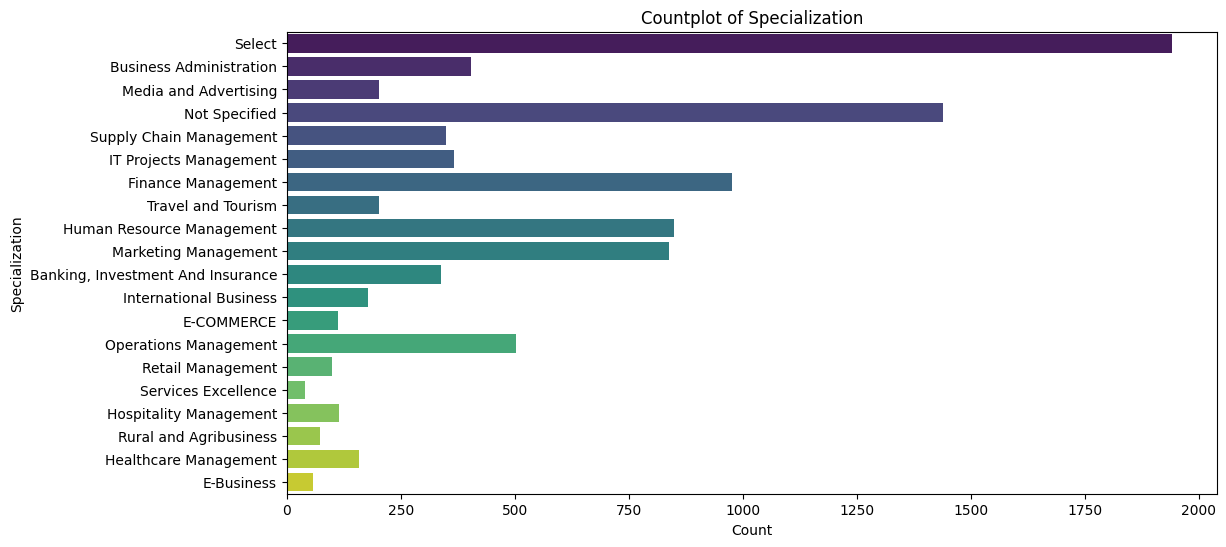

In [189]:
column_name = 'Specialization'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [190]:
# Assuming 'cleaned_data' is your DataFrame
cleaned_data['Specialization'] = cleaned_data['Specialization'].replace(
    ['Finance Management', 'Human Resource Management', 'Marketing Management',
     'Operations Management', 'IT Projects Management', 'Supply Chain Management',
     'Healthcare Management', 'Hospitality Management', 'Retail Management'],
    'Management_Specializations'
)


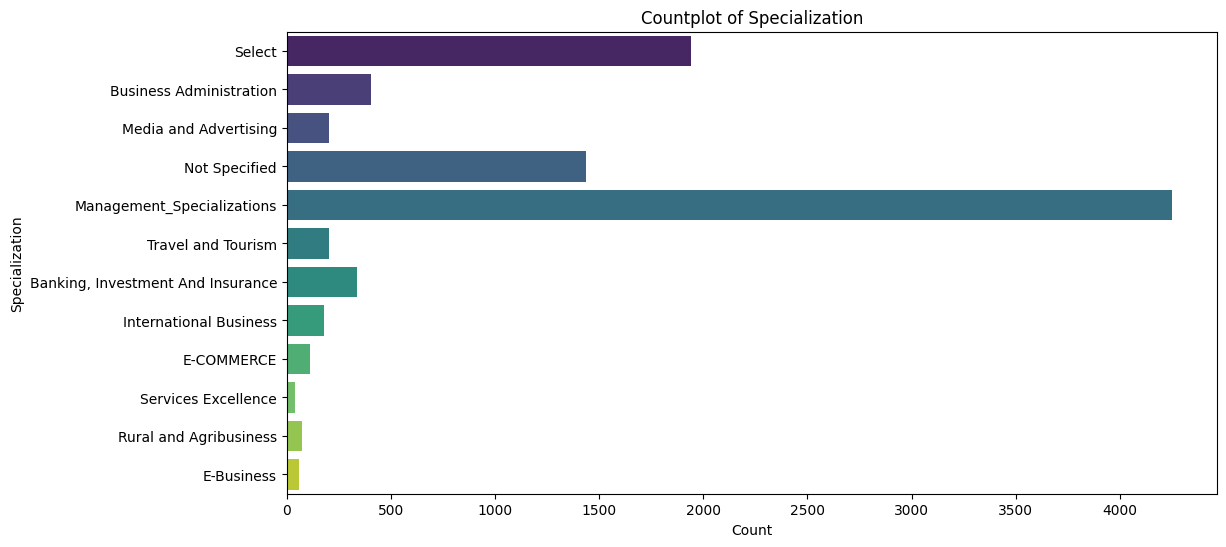

In [191]:
column_name = 'Specialization'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [192]:

# Specify the column for which you want to summarize
column_name = 'City'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for City:

Total unique values: 8
Most common value: Mumbai (Count: 3222)
Least common value: Tier II Cities (Count: 74)
Total missing values: 1420

Value Counts:
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


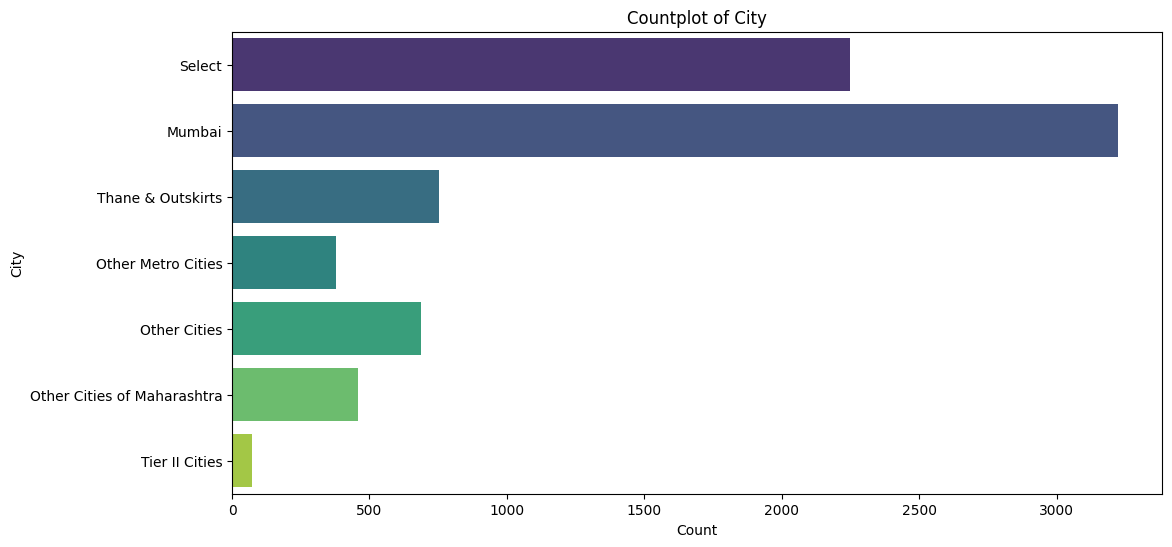

In [193]:
column_name = 'City'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [194]:
cleaned_data['City'] = cleaned_data['City'].replace(np.nan, 'Mumbai')

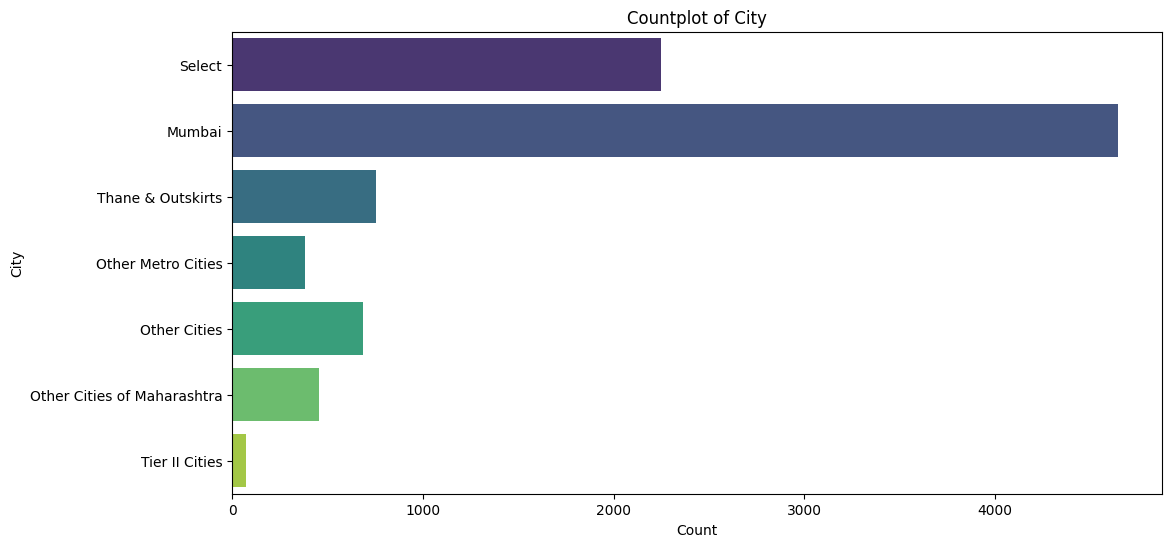

In [195]:
column_name = 'City'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [196]:
# Specify the column for which you want to summarize
column_name = 'Page Views Per Visit'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for Page Views Per Visit:

Total unique values: 115
Most common value: 0.0 (Count: 2189)
Least common value: 4.17 (Count: 1)
Total missing values: 137

Value Counts:
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64


In [197]:
# Specify the column for which you want to summarize
column_name = 'TotalVisits'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for TotalVisits:

Total unique values: 42
Most common value: 0.0 (Count: 2189)
Least common value: 141.0 (Count: 1)
Total missing values: 137

Value Counts:
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64


In [198]:
# Specify the column for which you want to summarize
column_name = 'Last Activity'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for Last Activity:

Total unique values: 18
Most common value: Email Opened (Count: 3437)
Least common value: Visited Booth in Tradeshow (Count: 1)
Total missing values: 103

Value Counts:
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


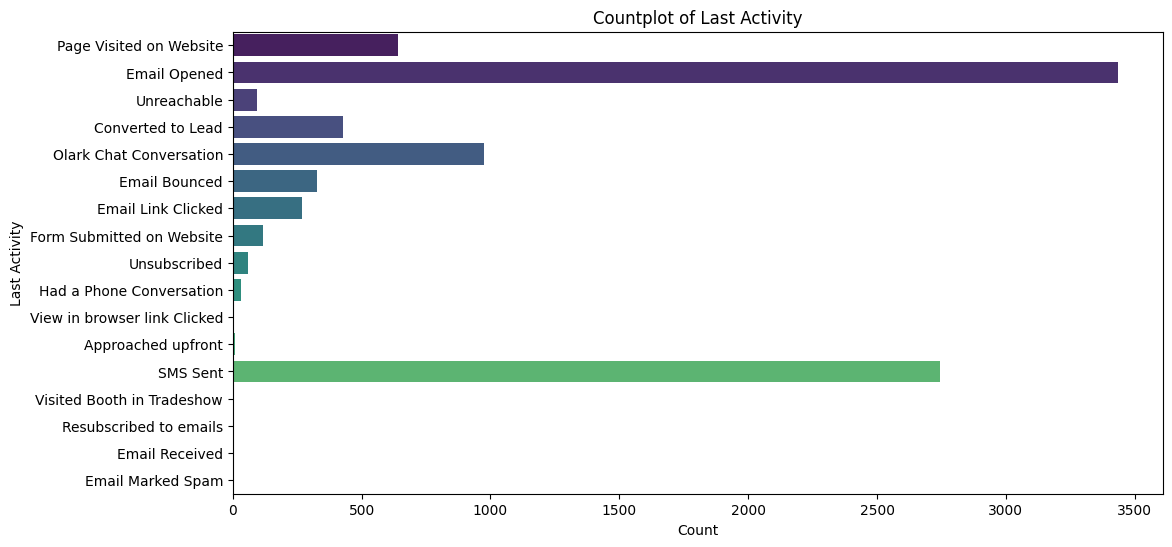

In [199]:
column_name = 'Last Activity'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [200]:
# Assuming 'cleaned_data' is your DataFrame
cleaned_data['Last Activity'] = cleaned_data['Last Activity'].replace(np.nan, 'Others')
cleaned_data['Last Activity'] = cleaned_data['Last Activity'].replace(
    ['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
     'View in browser link Clicked', 'Email Marked Spam', 'Email Received',
     'Resubscribed to emails', 'Visited Booth in Tradeshow'],
    'Others'
)


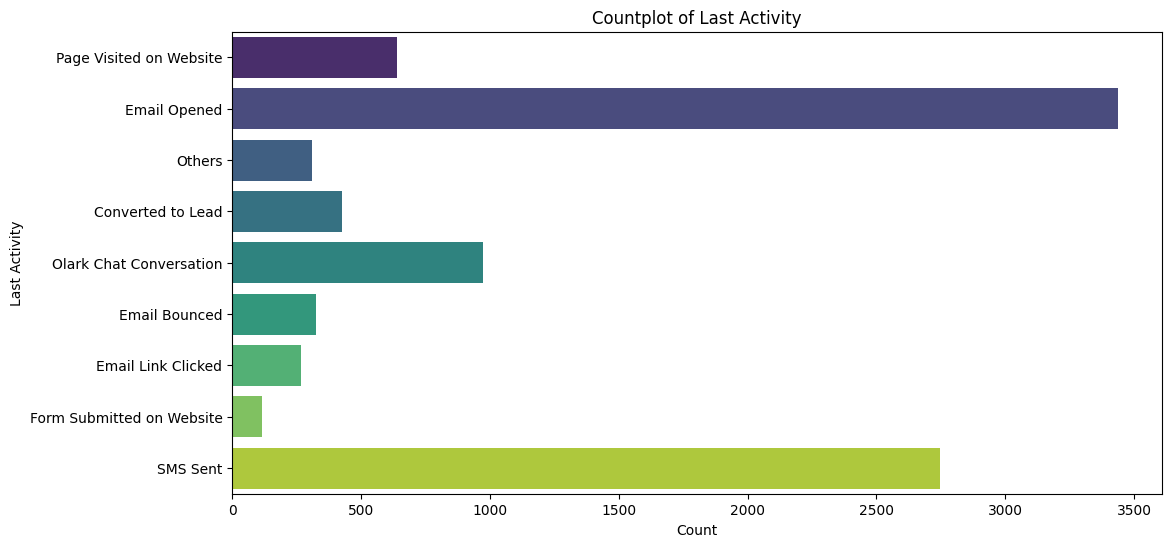

In [201]:
column_name = 'Last Activity'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [202]:
# Specify the column for which you want to summarize
column_name = 'Lead Source'

# Get the value counts
value_counts = cleaned_data[column_name].value_counts(dropna=False)

# Display the summary
print(f"Summary for {column_name}:\n")
print(f"Total unique values: {len(value_counts)}")
print(f"Most common value: {value_counts.idxmax()} (Count: {value_counts.max()})")
print(f"Least common value: {value_counts.idxmin()} (Count: {value_counts.min()})")
print(f"Total missing values: {data[column_name].isnull().sum()}")
print("\nValue Counts:")
print(value_counts)

Summary for Lead Source:

Total unique values: 22
Most common value: Google (Count: 2868)
Least common value: youtubechannel (Count: 1)
Total missing values: 36

Value Counts:
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


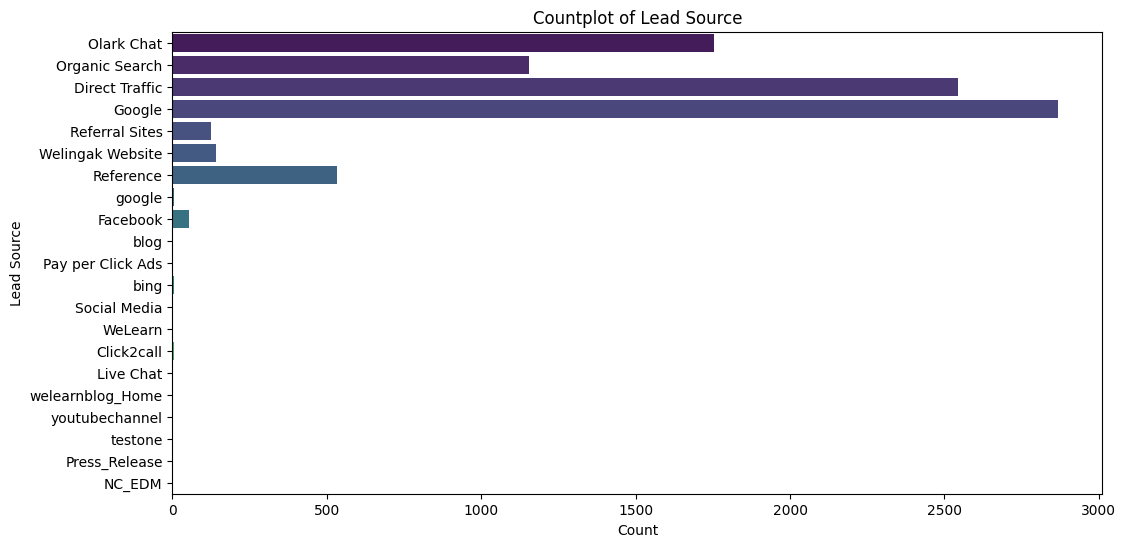

In [203]:
# Specify the column for which you want to summarize
column_name = 'Lead Source'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [204]:
# Assuming 'cleaned_data' is your DataFrame
cleaned_data['Lead Source'] = cleaned_data['Lead Source'].replace(np.nan, 'Others')
cleaned_data['Lead Source'] = cleaned_data['Lead Source'].replace('google', 'Google')
cleaned_data['Lead Source'] = cleaned_data['Lead Source'].replace('Facebook', 'Social Media')
cleaned_data['Lead Source'] = cleaned_data['Lead Source'].replace(
    ['bing', 'Click2call', 'Press_Release', 'youtubechannel', 'welearnblog_Home',
     'WeLearn', 'blog', 'Pay per Click Ads', 'testone', 'NC_EDM'],
    'Others'
)


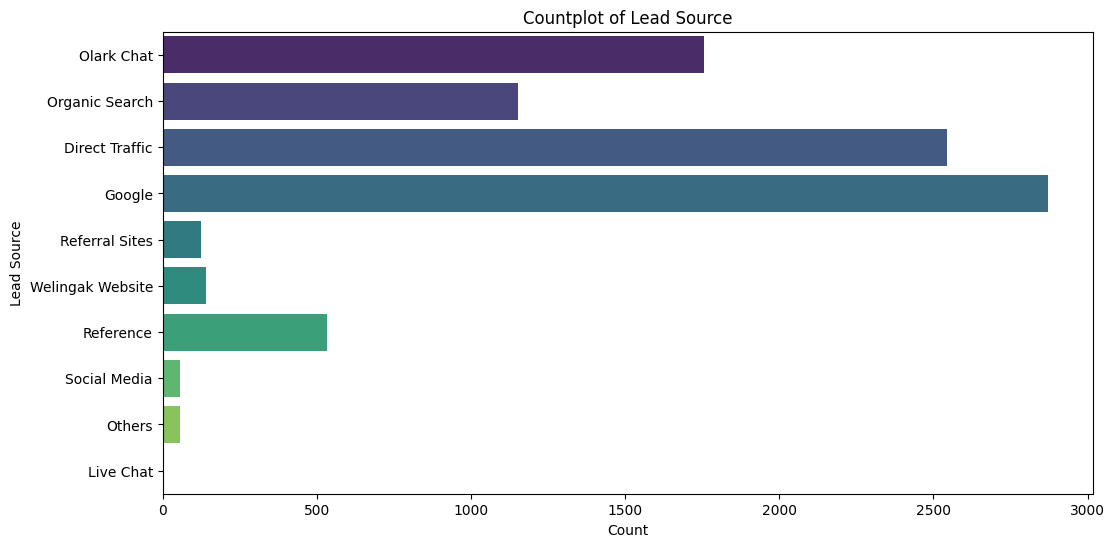

In [205]:
# Specify the column for which you want to summarize
column_name = 'Lead Source'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [206]:

# Checking the number of missing values in each column
cleaned_data.isnull().sum().sort_values(ascending=False)

Lead Profile                                2709
TotalVisits                                  137
Page Views Per Visit                         137
Prospect ID                                    0
Newspaper Article                              0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
City                                           0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Newspaper                                      0
X Education Forums                             0
Magazine                                       0
Lead Number                                    0
Search                                         0
What is your current occupation                0
Specialization                                 0
Last Activity       

In [207]:
# Assuming cleaned_data is your DataFrame

# Specify the list of columns to check
columns_to_check = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine',
                     'Newspaper Article', 'X Education Forums', 'Newspaper',
                     'Digital Advertisement', 'Through Recommendations',
                     'Receive More Updates About Our Courses',
                     'Update me on Supply Chain Content',
                     'Get updates on DM Content',
                     'I agree to pay the amount through cheque',
                     'A free copy of Mastering The Interview']

# Display value counts for each specified column
for column in columns_to_check:
    print(f"Column: {column}")
    print(cleaned_data[column].value_counts())
    print("\n" + "="*30 + "\n")  # Separating each column's output for clarity

Column: Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64


Column: Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64


Column: Search
No     9226
Yes      14
Name: Search, dtype: int64


Column: Magazine
No    9240
Name: Magazine, dtype: int64


Column: Newspaper Article
No     9238
Yes       2
Name: Newspaper Article, dtype: int64


Column: X Education Forums
No     9239
Yes       1
Name: X Education Forums, dtype: int64


Column: Newspaper
No     9239
Yes       1
Name: Newspaper, dtype: int64


Column: Digital Advertisement
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


Column: Through Recommendations
No     9233
Yes       7
Name: Through Recommendations, dtype: int64


Column: Receive More Updates About Our Courses
No    9240
Name: Receive More Updates About Our Courses, dtype: int64


Column: Update me on Supply Chain Content
No    9240
Name: Update me on Supply Chain Content, dtype: int64


Column: Get updates on DM Conte

In [208]:
# Assuming 'cleaned_data' is your DataFrame
columns_to_drop = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                   'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content', 'Get updates on DM Content',
                   'I agree to pay the amount through cheque']

# Drop the specified columns
cleaned_data = cleaned_data.drop(columns=columns_to_drop, axis=1)

In [209]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9103 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [210]:
cleaned_data.isnull().sum().sort_values(ascending=False)

Lead Profile                              2709
Page Views Per Visit                       137
TotalVisits                                137
Prospect ID                                  0
A free copy of Mastering The Interview       0
City                                         0
What is your current occupation              0
Specialization                               0
Last Activity                                0
Total Time Spent on Website                  0
Lead Number                                  0
Converted                                    0
Do Not Call                                  0
Do Not Email                                 0
Lead Source                                  0
Lead Origin                                  0
Last Notable Activity                        0
dtype: int64

In [211]:
cleaned_data['Lead Profile'].value_counts(dropna=False)


Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [212]:
cleaned_data = cleaned_data.dropna(subset=['Lead Profile'])

In [213]:
cleaned_data = cleaned_data.dropna(subset=['Page Views Per Visit'])

In [214]:
cleaned_data = cleaned_data.dropna(subset=['TotalVisits'])

In [215]:
# Checking the number of missing values in each column
cleaned_data.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Page Views Per Visit                      0
A free copy of Mastering The Interview    0
City                                      0
Lead Profile                              0
What is your current occupation           0
Specialization                            0
Last Activity                             0
Total Time Spent on Website               0
Lead Number                               0
TotalVisits                               0
Converted                                 0
Do Not Call                               0
Do Not Email                              0
Lead Source                               0
Lead Origin                               0
Last Notable Activity                     0
dtype: int64

In [216]:
cleaned_data['TotalVisits'].value_counts(dropna=False)

0.0      1375
2.0      1226
3.0       937
4.0       823
5.0       578
6.0       337
1.0       260
7.0       225
8.0       162
9.0       128
10.0       76
11.0       70
13.0       39
12.0       31
14.0       28
16.0       16
15.0       14
17.0       12
18.0       12
20.0       10
19.0        6
21.0        5
23.0        5
27.0        5
25.0        3
24.0        3
22.0        3
29.0        2
26.0        2
55.0        1
30.0        1
43.0        1
74.0        1
251.0       1
32.0        1
28.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [217]:
# Checking the number of missing values in each column
cleaned_data.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Page Views Per Visit                      0
A free copy of Mastering The Interview    0
City                                      0
Lead Profile                              0
What is your current occupation           0
Specialization                            0
Last Activity                             0
Total Time Spent on Website               0
Lead Number                               0
TotalVisits                               0
Converted                                 0
Do Not Call                               0
Do Not Email                              0
Lead Source                               0
Lead Origin                               0
Last Notable Activity                     0
dtype: int64

In [73]:
cleaned_data['Tags'] = cleaned_data['Tags'].replace(np.nan, 'Not Specified')

In [74]:
# Assuming 'cleaned_data' is your DataFrame
cleaned_data['Tags'] = cleaned_data['Tags'].replace(
    ['In confusion whether part-time or DLP', 'in touch with EINS', 'Diploma holder (Not Eligible)',
     'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup', 'Still Thinking',
     'Lost to Others', 'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch',
     'Recognition issue (DEC approval)', 'Want to take admission but has financial problems',
     'University not recognized', 'switched off', 'Already a student', 'Not doing further education',
     'invalid number', 'wrong number given', 'Interested  in full-time MBA'],
    'Other_Tags'
)


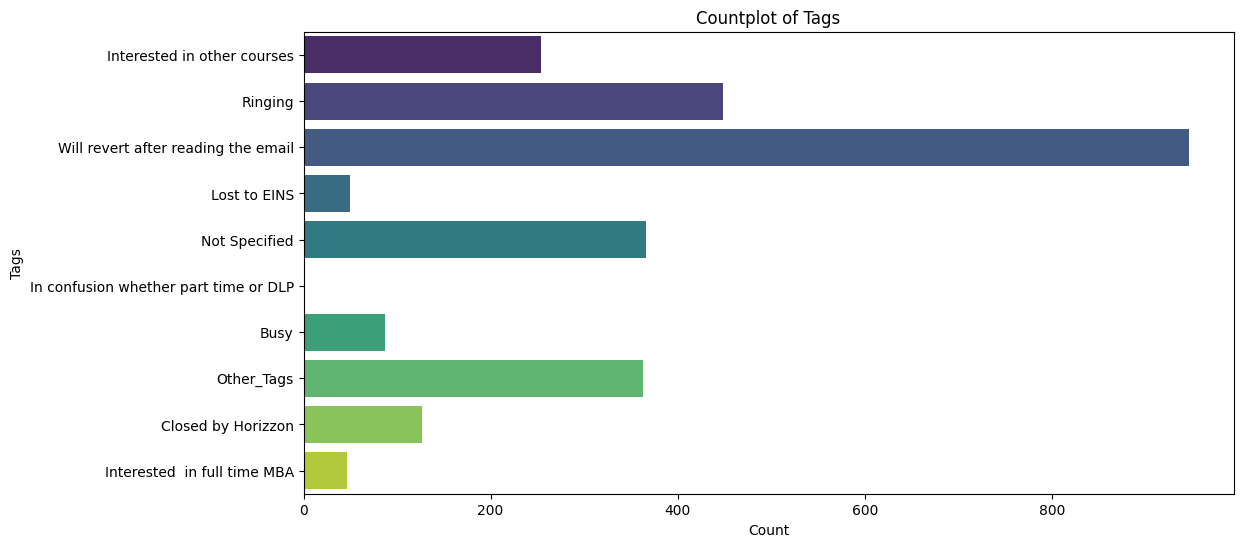

In [75]:
# Specify the column for which you want to summarize
column_name = 'Tags'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()


In [218]:
#checking value counts of last Notable Activity
cleaned_data ['Last Notable Activity'].value_counts()

Email Opened                    2042
Modified                        1950
SMS Sent                        1889
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

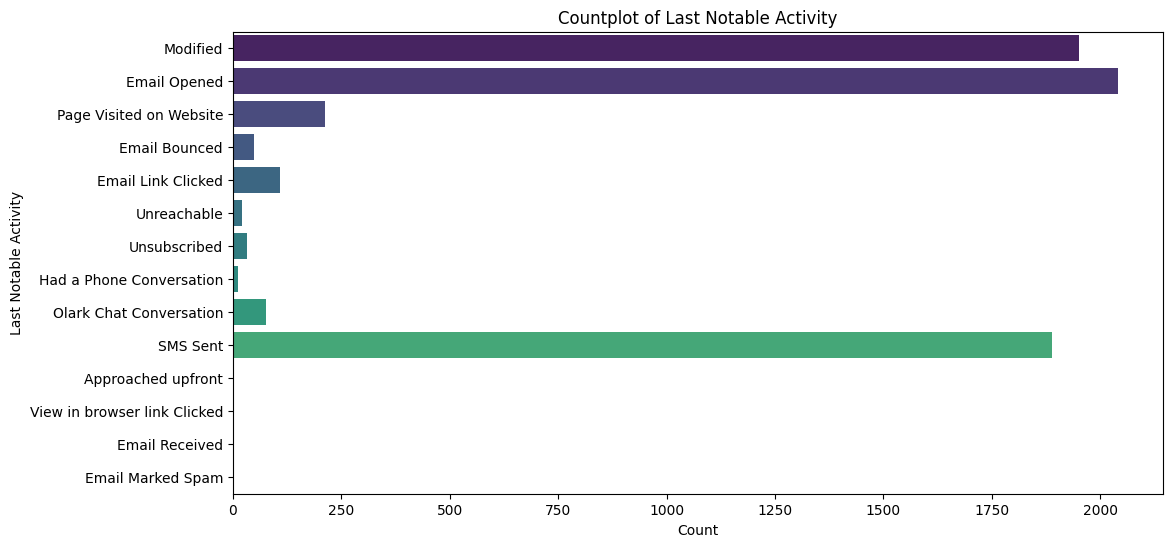

In [219]:
# Specify the column for which you want to summarize
column_name = 'Last Notable Activity'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [220]:
#clubbing lower frequency values

cleaned_data ['Last Notable Activity'] = cleaned_data ['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront',
                                                                       'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

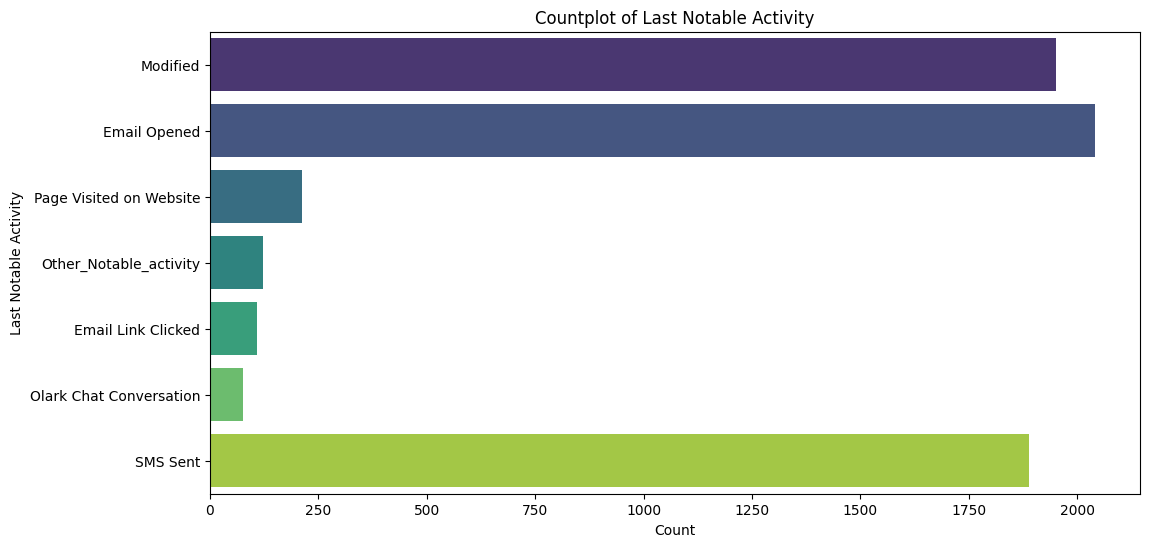

In [221]:
# Specify the column for which you want to summarize
column_name = 'Last Notable Activity'

# Create a Seaborn countplot
plt.figure(figsize=(12, 6))
sns.countplot(y= cleaned_data[column_name], palette='viridis')
plt.title(f'Countplot of {column_name}')
plt.xlabel('Count')
plt.ylabel(column_name)
plt.show()

In [222]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(cleaned_data['Converted'])/len(cleaned_data['Converted'].index))*100
Converted

48.28932979221997

In [223]:
#check for duplicates

sum(cleaned_data.duplicated(subset = 'Prospect ID')) == 0
sum(cleaned_data.duplicated(subset = 'Lead Number')) == 0

True

# Prospect ID & Lead Number are two variables that are just indicative of the ID number of the approched People so can be dropped.

In [224]:
# Assuming your DataFrame is named 'cleaned_data'
cleaned_data = cleaned_data.drop(['Prospect ID', 'Lead Number'], axis=1)


In [225]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6401 non-null   object 
 1   Lead Source                             6401 non-null   object 
 2   Do Not Email                            6401 non-null   object 
 3   Do Not Call                             6401 non-null   object 
 4   Converted                               6401 non-null   int64  
 5   TotalVisits                             6401 non-null   float64
 6   Total Time Spent on Website             6401 non-null   int64  
 7   Page Views Per Visit                    6401 non-null   float64
 8   Last Activity                           6401 non-null   object 
 9   Specialization                          6401 non-null   object 
 10  What is your current occupation         6401 non-null   obje

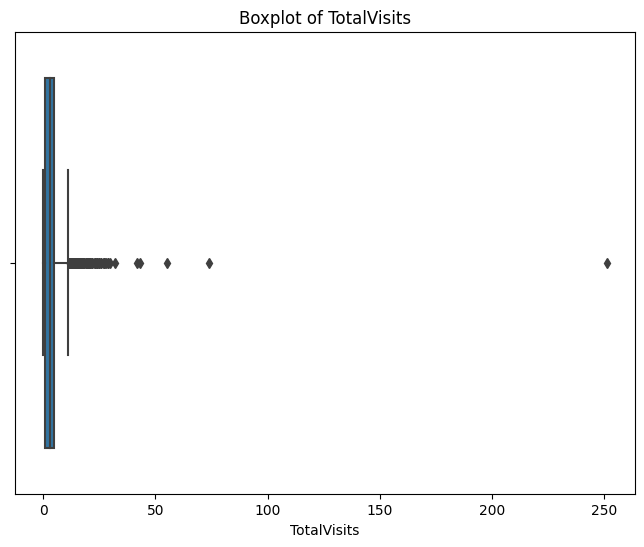

In [226]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_data['TotalVisits'])

plt.title('Boxplot of TotalVisits')
plt.xlabel('TotalVisits')

plt.show()

In [227]:
cleaned_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6401.000000
mean        3.590689
std         4.847158
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

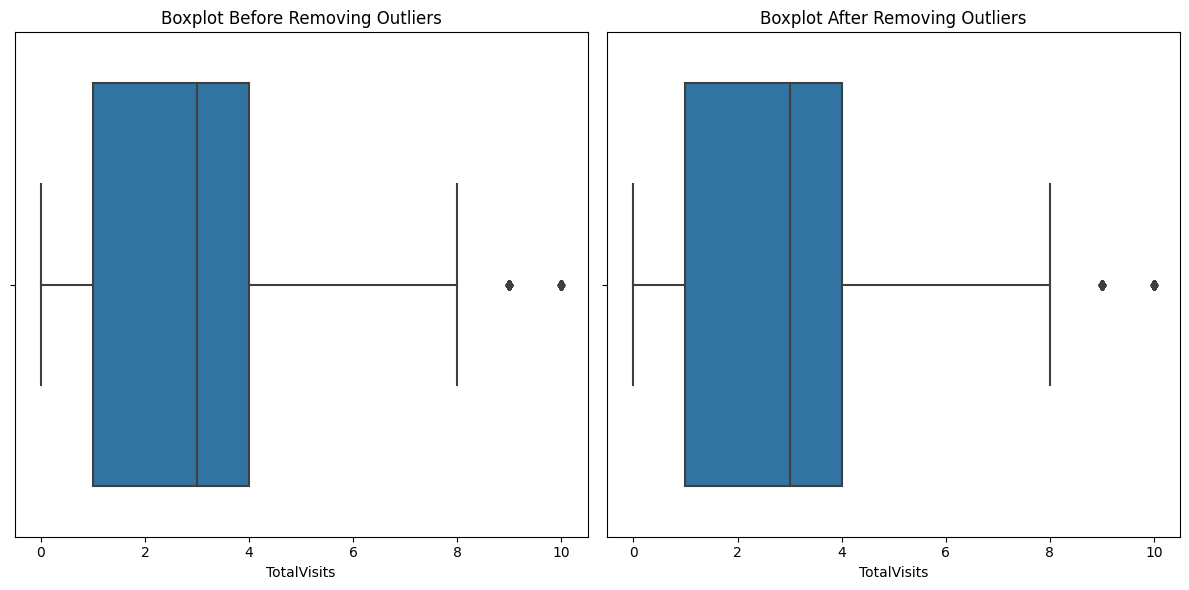

In [228]:


# Define the lower and upper percentiles for filtering
lower_percentile = 5
upper_percentile = 95

# Calculate the lower and upper bounds based on percentiles
lower_bound = cleaned_data['TotalVisits'].quantile(lower_percentile / 100)
upper_bound = cleaned_data['TotalVisits'].quantile(upper_percentile / 100)

# Filter the DataFrame to keep rows within the specified percentile range
cleaned_data= cleaned_data[
    (cleaned_data['TotalVisits'] >= lower_bound) & (cleaned_data['TotalVisits'] <= upper_bound)
]

# Plot the boxplot before and after removing outliers
plt.figure(figsize=(12, 6))

# Boxplot before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=cleaned_data['TotalVisits'])
plt.title('Boxplot Before Removing Outliers')
plt.xlabel('TotalVisits')

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=cleaned_data['TotalVisits'])
plt.title('Boxplot After Removing Outliers')
plt.xlabel('TotalVisits')

plt.tight_layout()
plt.show()


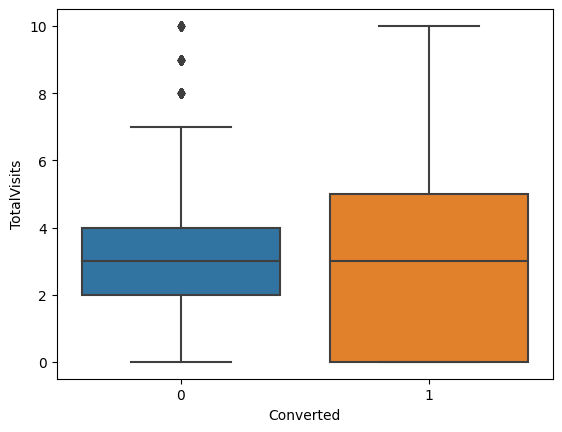

In [229]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=cleaned_data.Converted, y=cleaned_data['TotalVisits'])
plt.show()

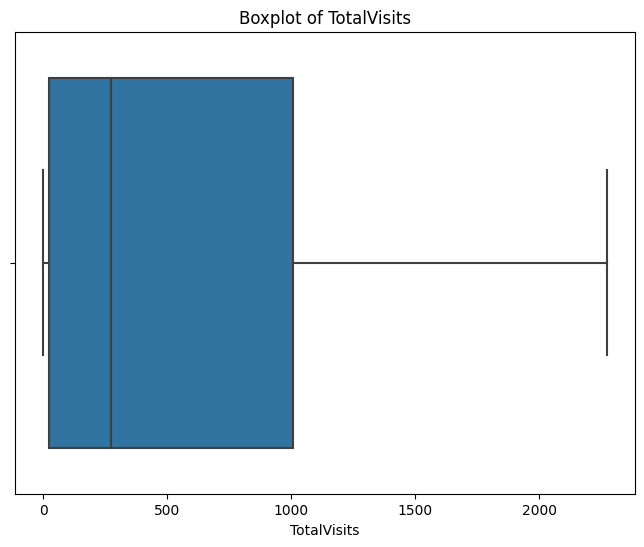

In [230]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_data['Total Time Spent on Website'])

plt.title('Boxplot of TotalVisits')
plt.xlabel('TotalVisits')

plt.show()

In [231]:
cleaned_data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6127.000000
mean      522.390240
std       562.419672
min         0.000000
5%          0.000000
25%        24.000000
50%       273.000000
75%      1009.000000
90%      1412.000000
95%      1584.000000
99%      1842.480000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

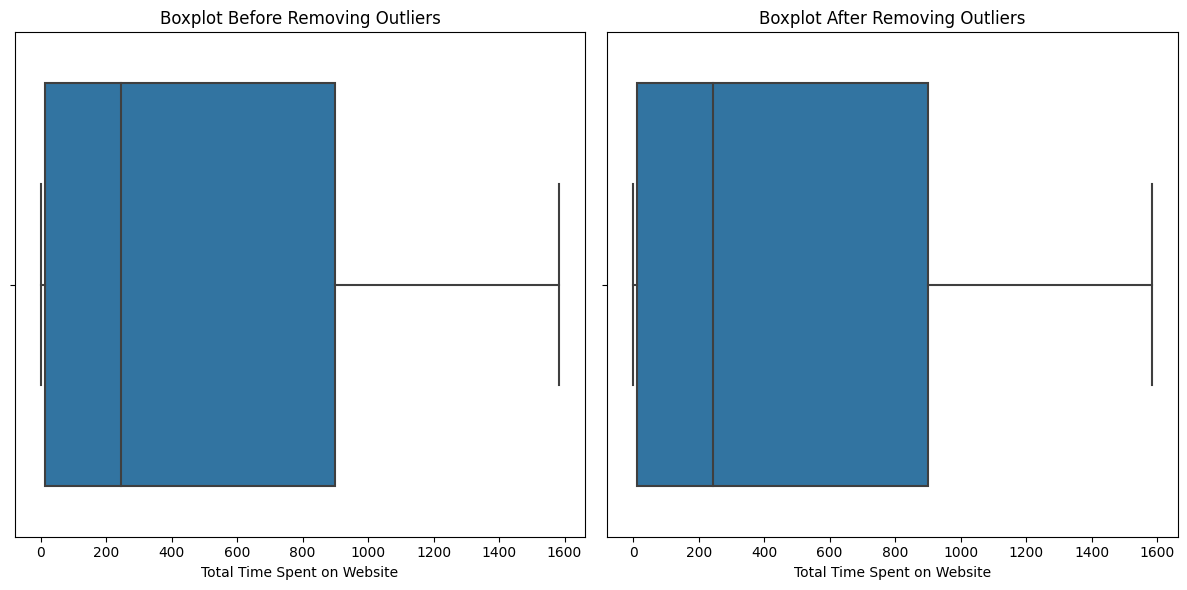

In [232]:


# Define the lower and upper percentiles for filtering
lower_percentile = 5
upper_percentile = 95

# Calculate the lower and upper bounds based on percentiles
lower_bound = cleaned_data['Total Time Spent on Website'].quantile(lower_percentile / 100)
upper_bound = cleaned_data['Total Time Spent on Website'].quantile(upper_percentile / 100)

# Filter the DataFrame to keep rows within the specified percentile range
cleaned_data = cleaned_data[
    (cleaned_data['Total Time Spent on Website'] >= lower_bound) & (cleaned_data['Total Time Spent on Website'] <= upper_bound)
]

# Plot the boxplot before and after removing outliers
plt.figure(figsize=(12, 6))

# Boxplot before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=cleaned_data['Total Time Spent on Website'])
plt.title('Boxplot Before Removing Outliers')
plt.xlabel('Total Time Spent on Website')

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=cleaned_data['Total Time Spent on Website'])
plt.title('Boxplot After Removing Outliers')
plt.xlabel('Total Time Spent on Website')

plt.tight_layout()
plt.show()


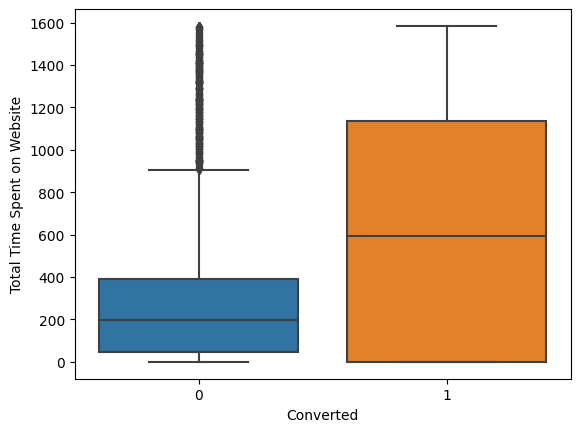

In [233]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=cleaned_data.Converted, y=cleaned_data['Total Time Spent on Website'])
plt.show()

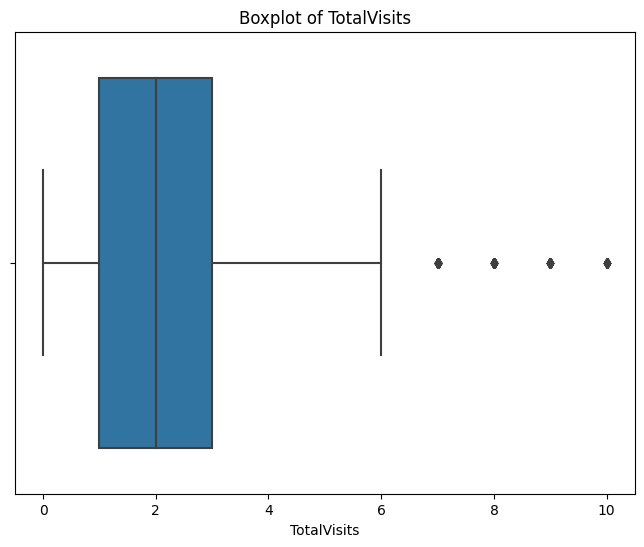

In [234]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_data['Page Views Per Visit'])

plt.title('Boxplot of TotalVisits')
plt.xlabel('TotalVisits')

plt.show()

In [235]:
cleaned_data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    5821.000000
mean        2.310560
std         1.927122
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

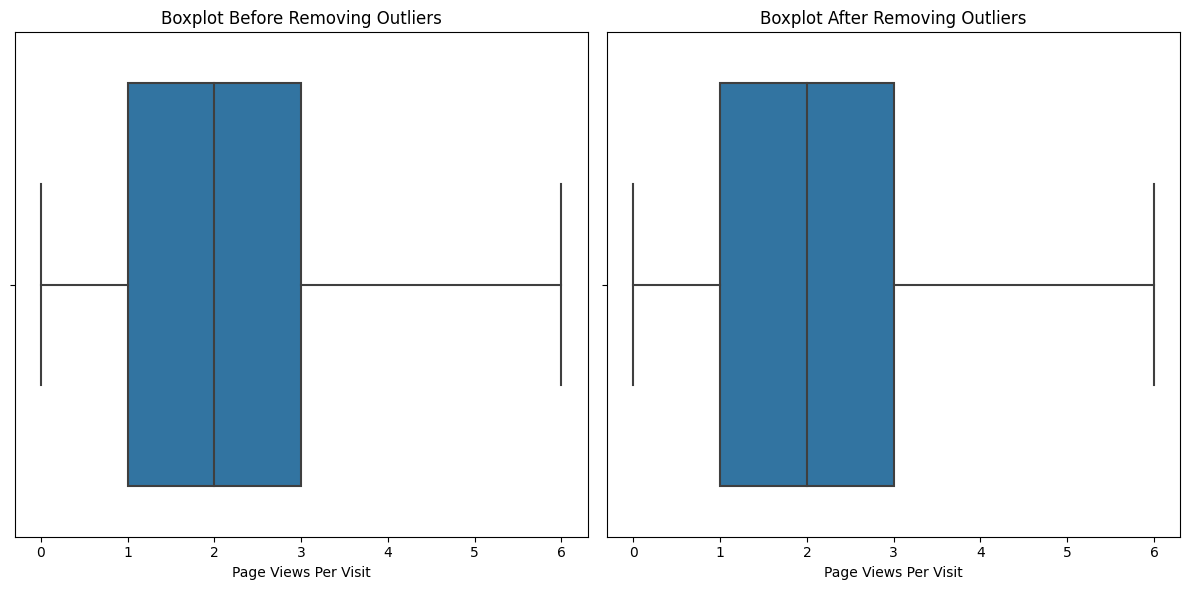

In [236]:

# Define the lower and upper percentiles for filtering
lower_percentile = 5
upper_percentile = 95

# Calculate the lower and upper bounds based on percentiles
lower_bound = cleaned_data['Page Views Per Visit'].quantile(lower_percentile / 100)
upper_bound = cleaned_data['Page Views Per Visit'].quantile(upper_percentile / 100)

# Filter the DataFrame to keep rows within the specified percentile range
cleaned_data = cleaned_data[
    (cleaned_data['Page Views Per Visit'] >= lower_bound) & (cleaned_data['Page Views Per Visit'] <= upper_bound)
]

# Plot the boxplot before and after removing outliers
plt.figure(figsize=(12, 6))

# Boxplot before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=cleaned_data['Page Views Per Visit'])
plt.title('Boxplot Before Removing Outliers')
plt.xlabel('Page Views Per Visit')

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=cleaned_data['Page Views Per Visit'])
plt.title('Boxplot After Removing Outliers')
plt.xlabel('Page Views Per Visit')

plt.tight_layout()
plt.show()

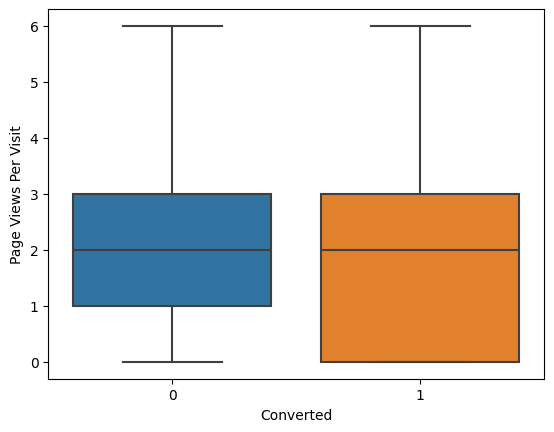

In [237]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=cleaned_data.Converted, y=cleaned_data['Page Views Per Visit'])
plt.show()

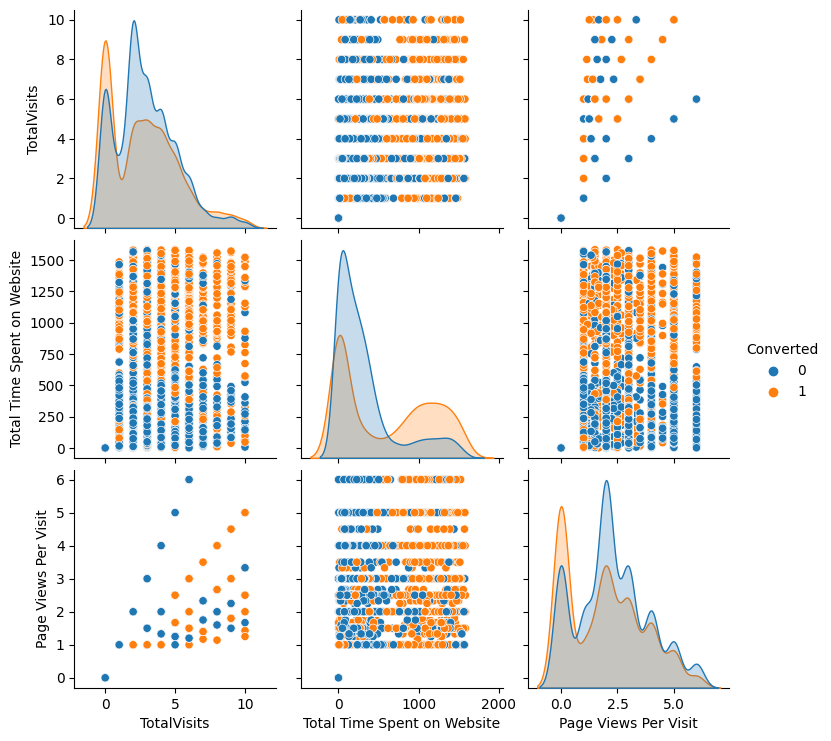

In [238]:
sns.pairplot(cleaned_data,diag_kind='kde',hue='Converted')
plt.show()

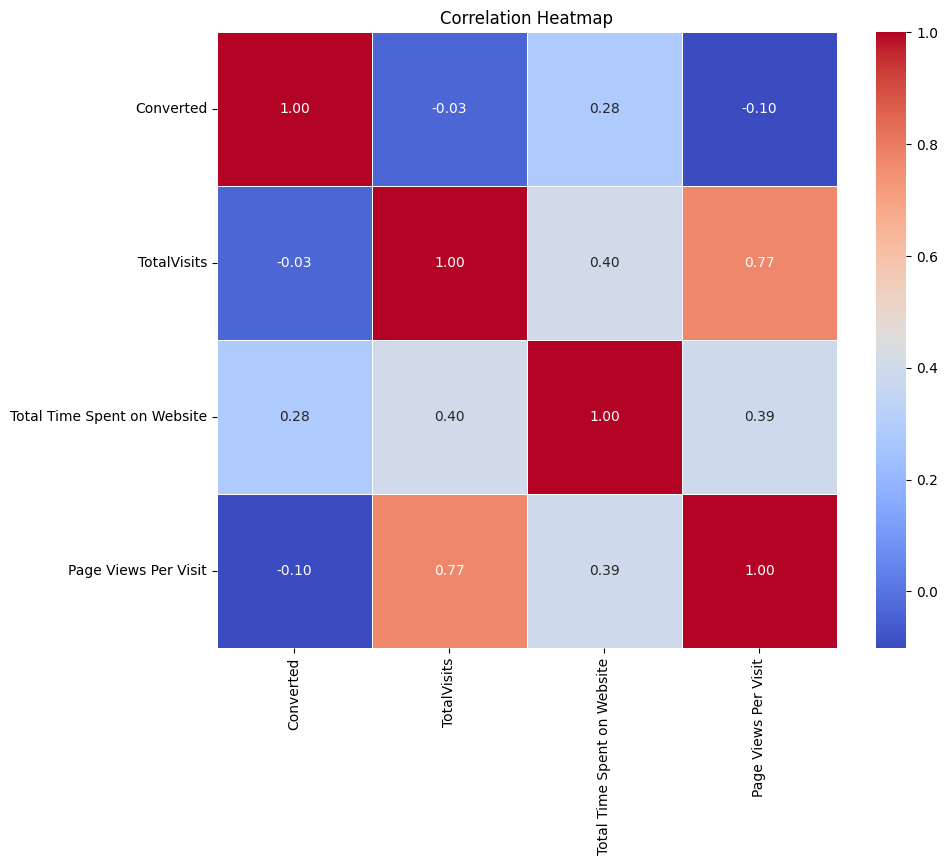

In [239]:
# Assuming 'leads' is your DataFrame
plt.figure(figsize=(10, 8))

# heatmap
sns.heatmap(cleaned_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

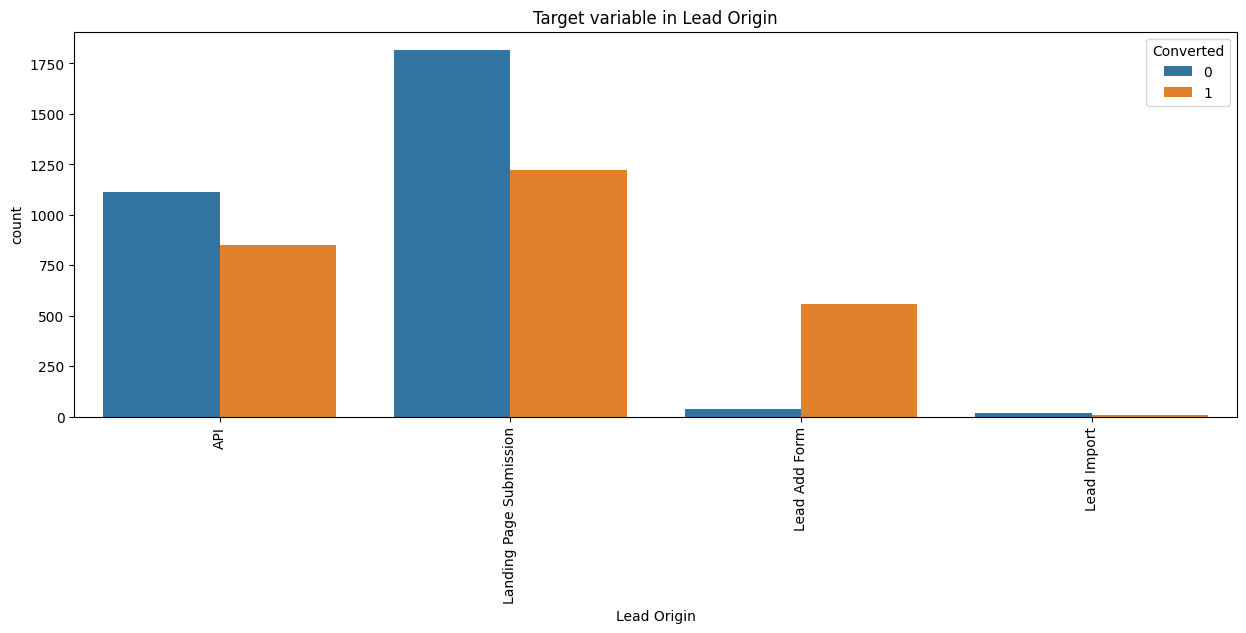

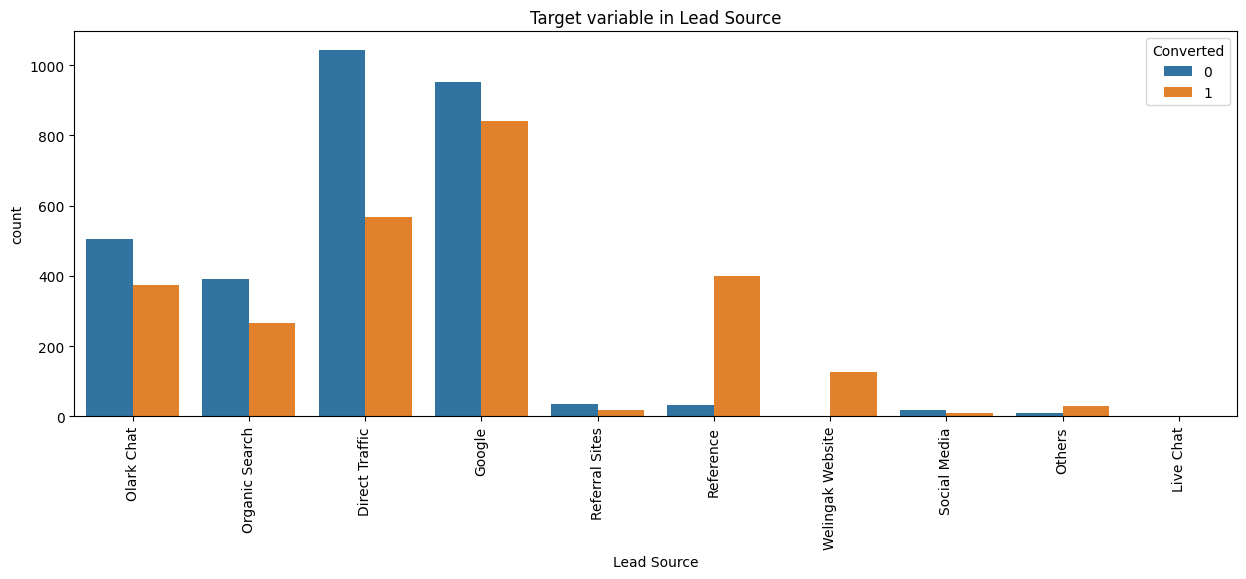

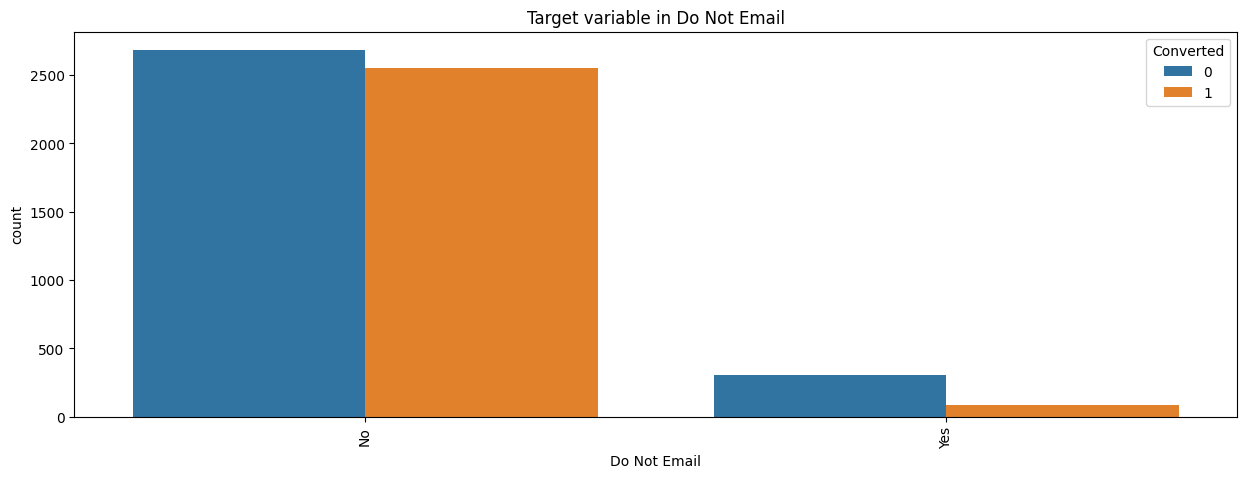

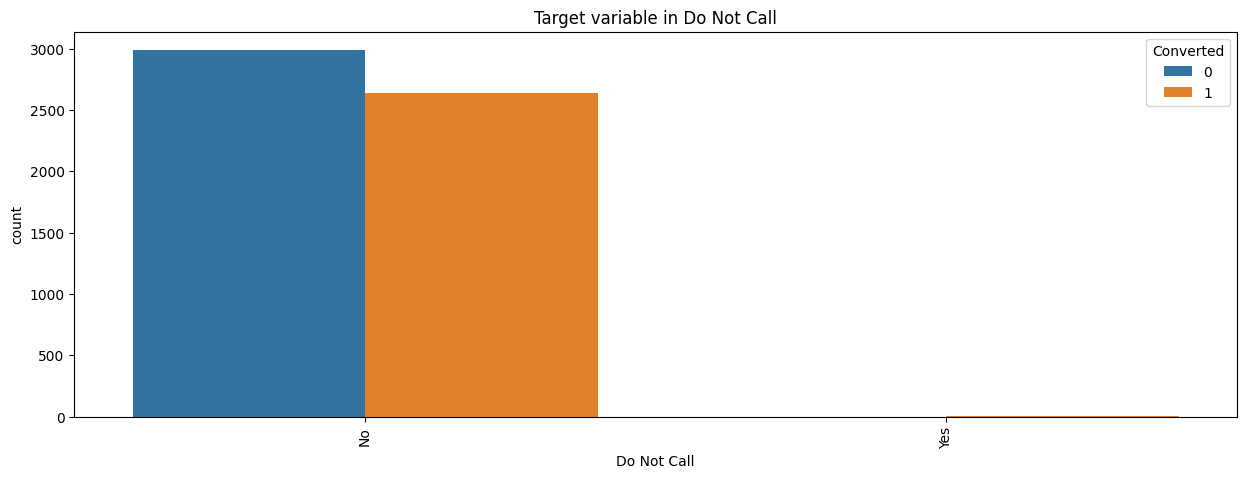

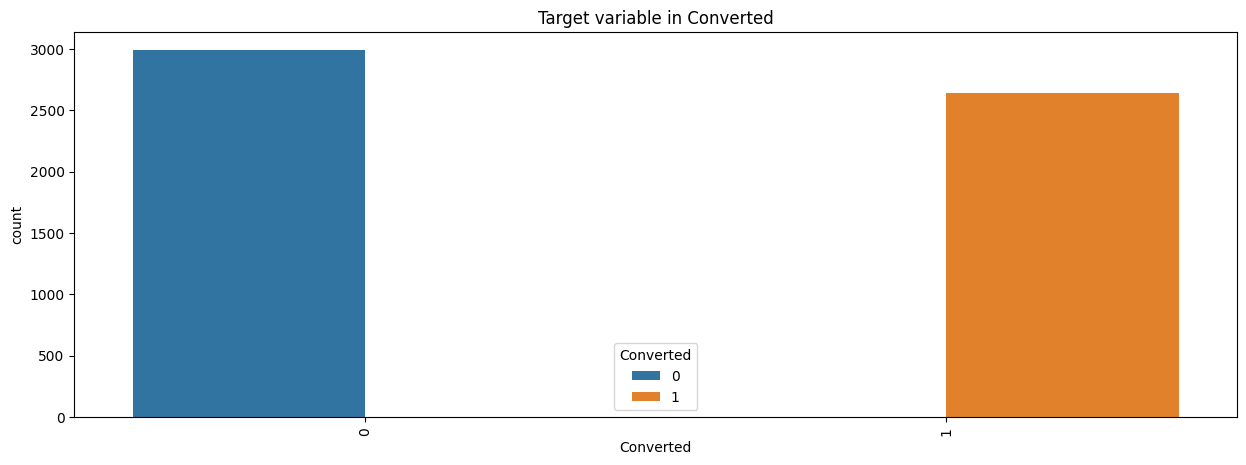

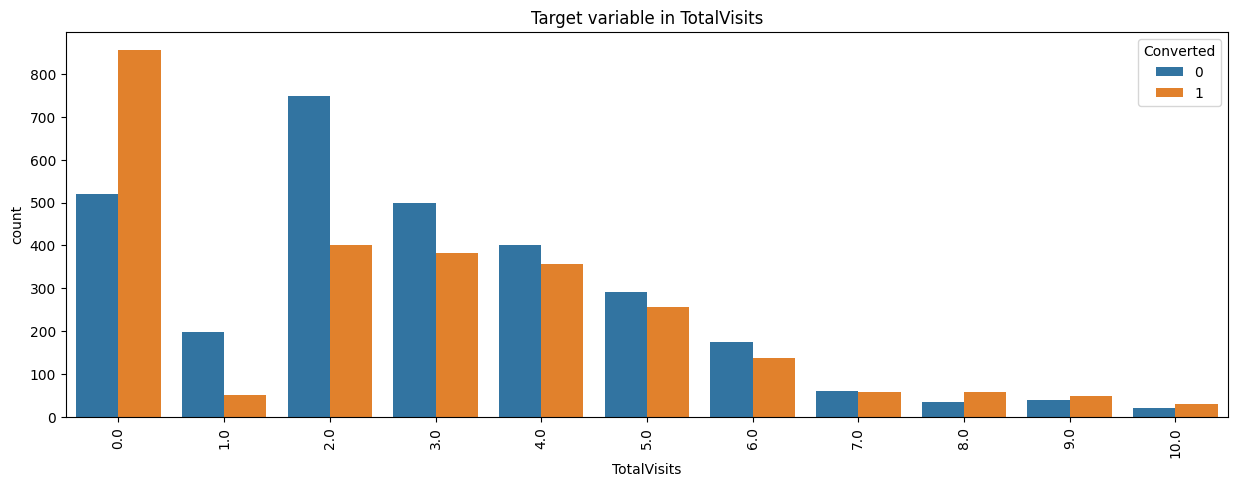

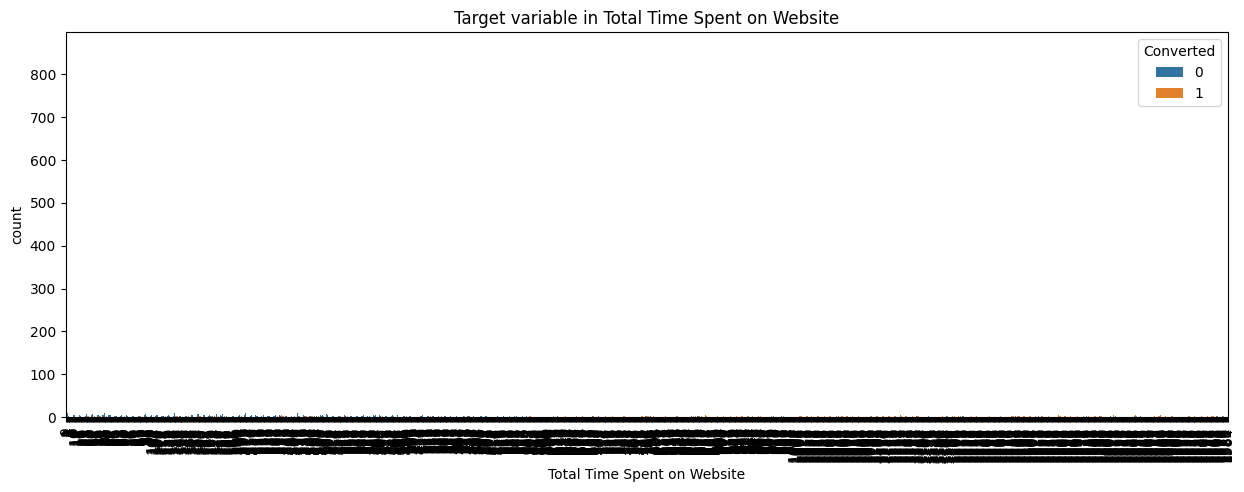

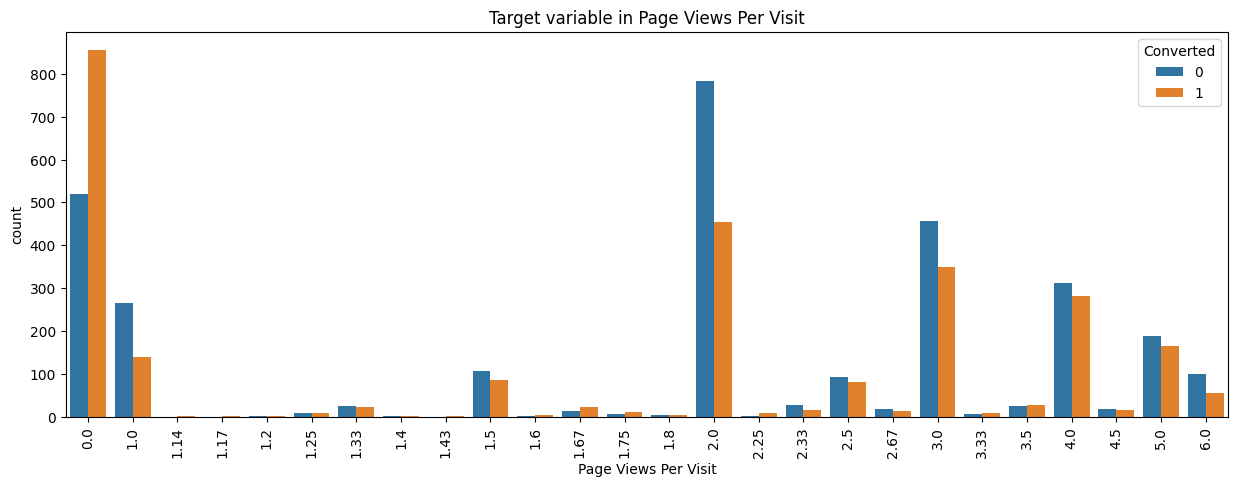

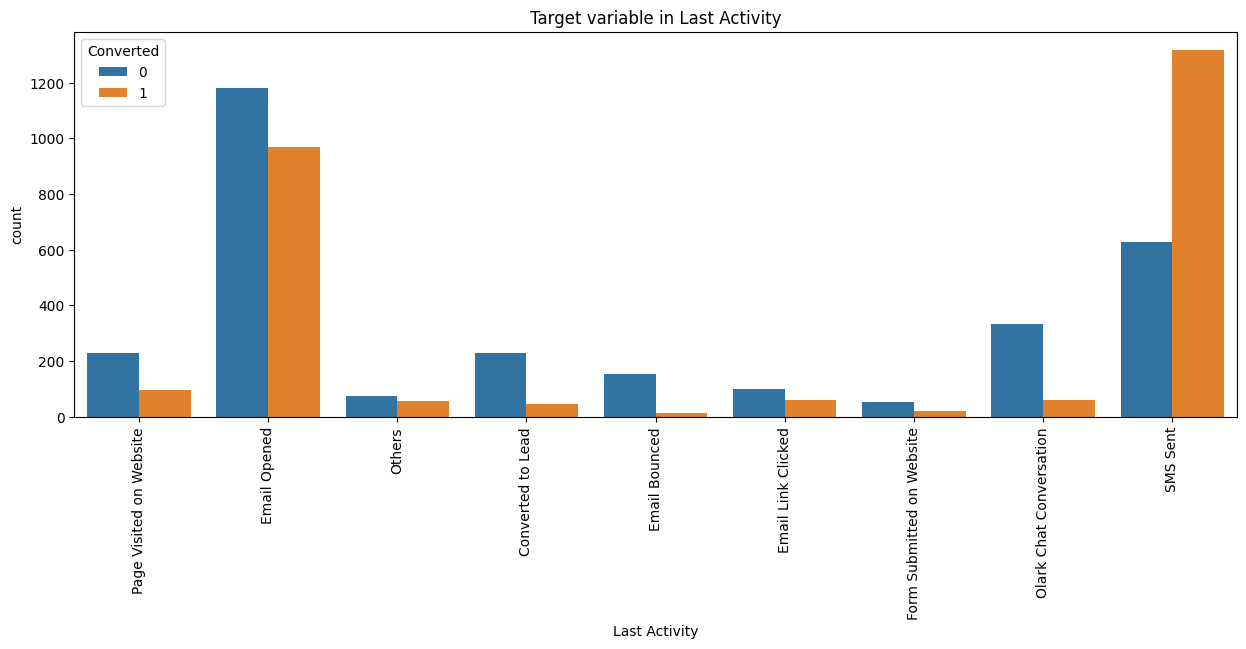

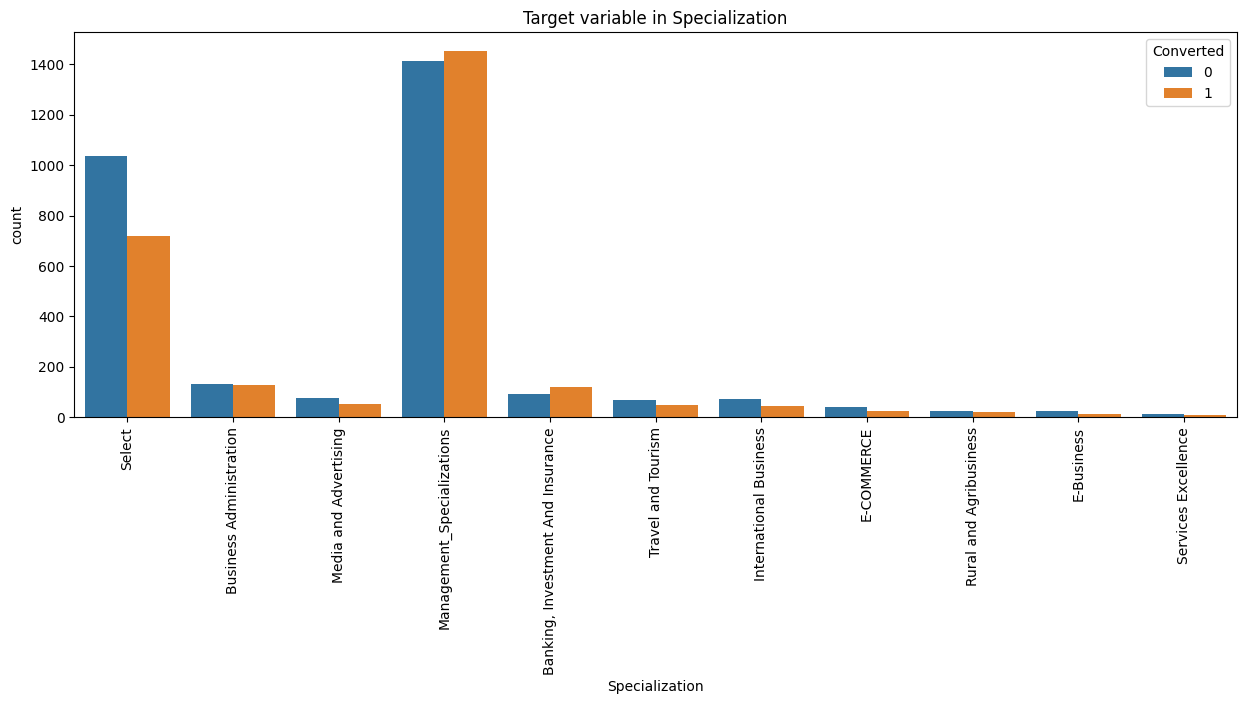

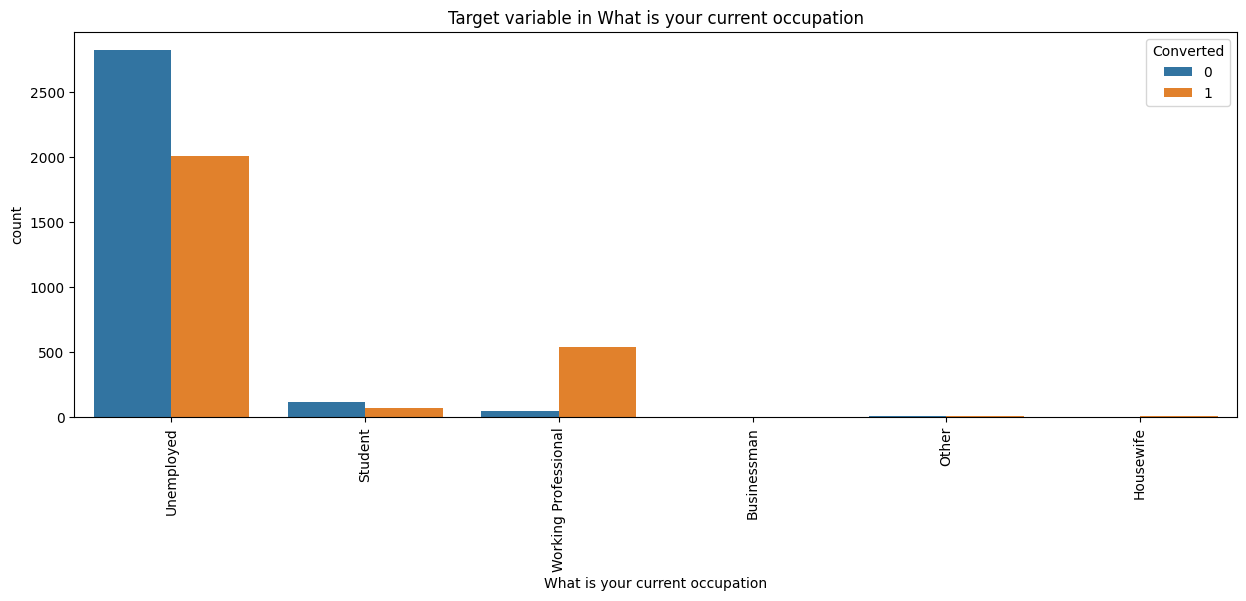

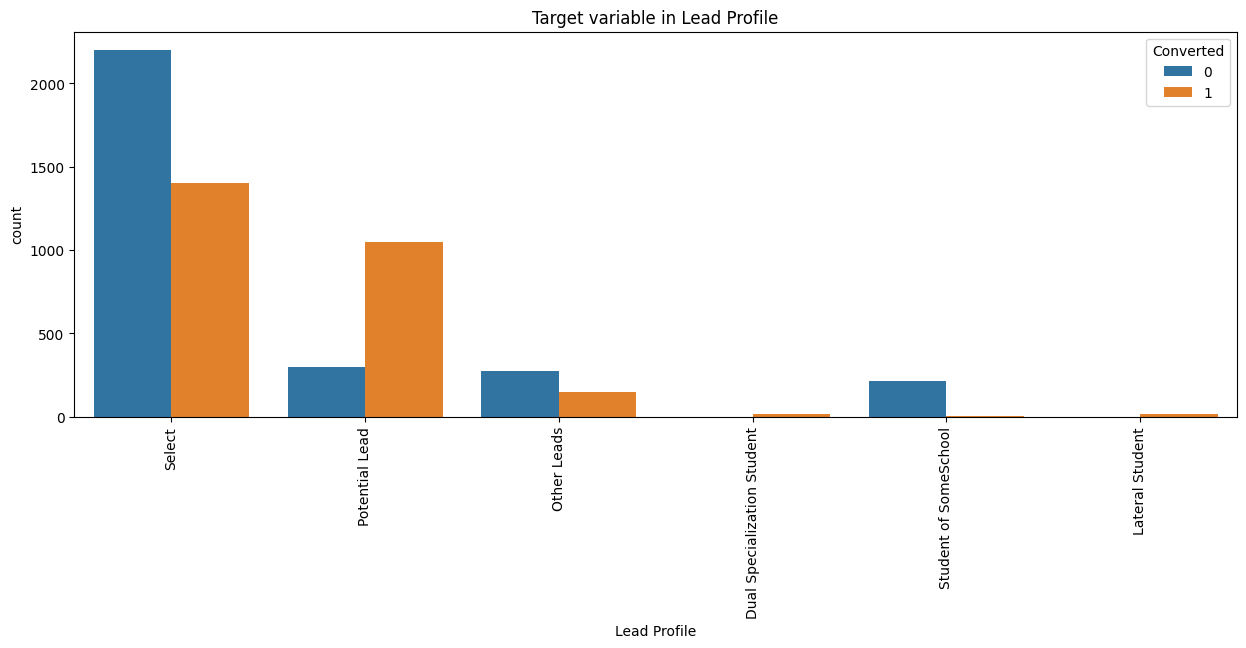

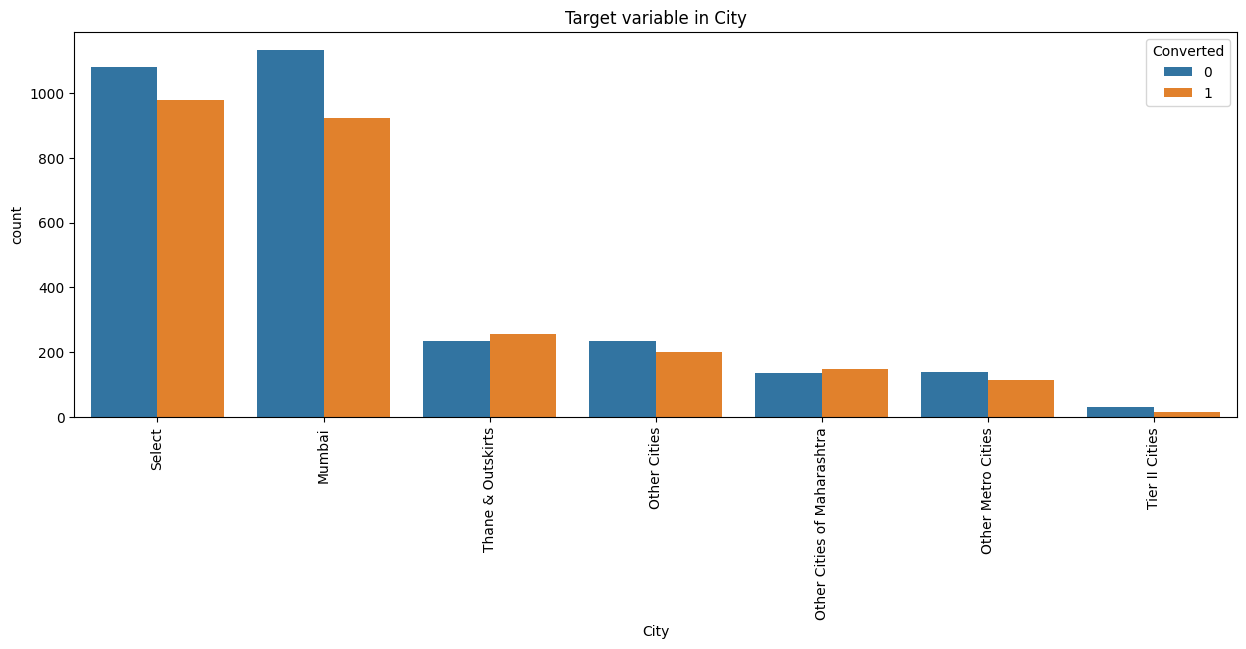

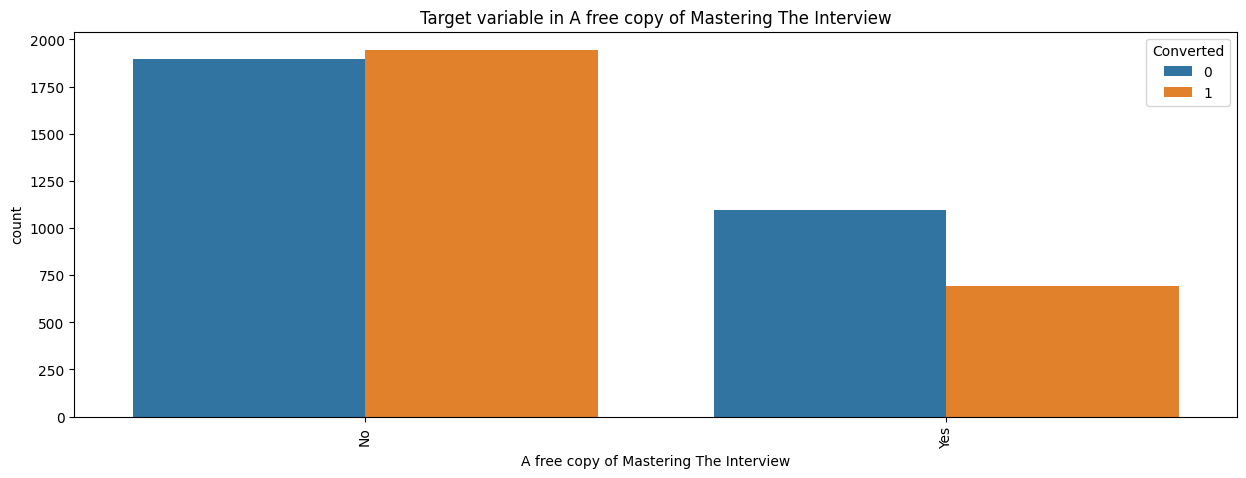

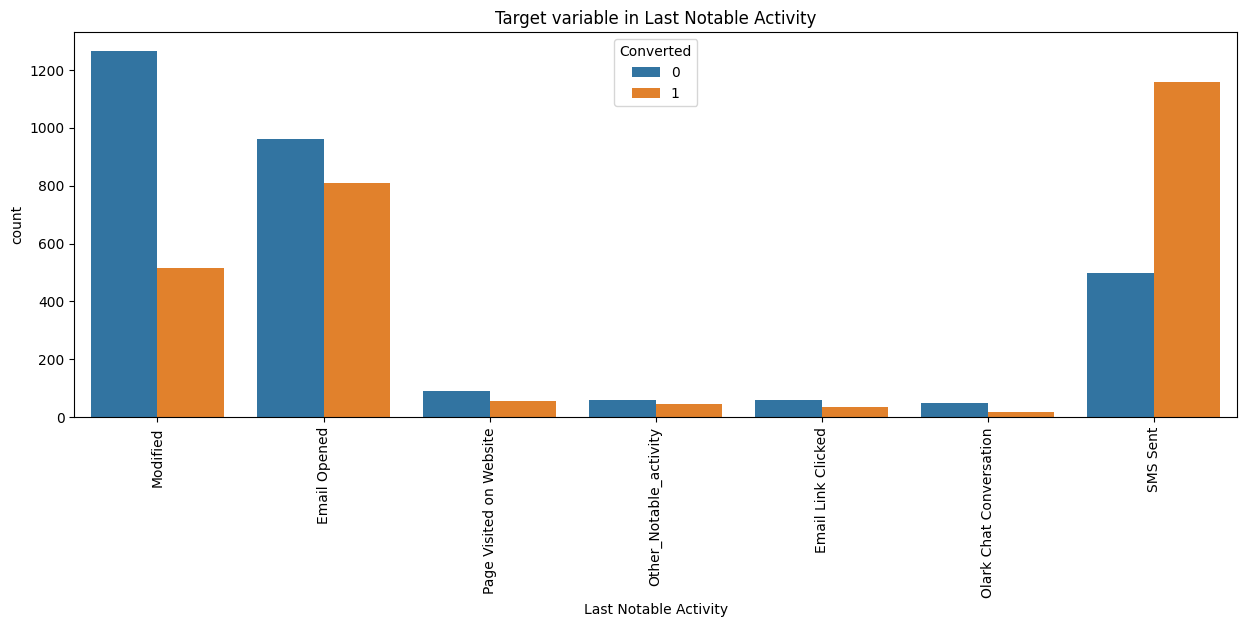

In [240]:


for i in cleaned_data.columns:
 plt.figure(figsize=(15, 5))
 sns.countplot(x=i, hue='Converted', data=cleaned_data)
 plt.xticks(rotation=90)
 plt.title(f'Target variable in {i}')
 plt.xlabel(i)
 plt.show()



In [241]:
#getting a list of categorical columns

cat_cols= cleaned_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [242]:
# Assuming 'cleaned_data' is your DataFrame
cleaned_data = cleaned_data.drop(columns=['Do Not Call','City'])

# Display the resulting DataFrame
print(cleaned_data.head())


               Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   

In [243]:
cleaned_data.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation    Lead Profile  \
0                      Unemployed          Select   
1                      Unemployed          Select   
2                         Student  Potential Lead   
3                      Unemployed          Select   
4                      Unemployed          Select   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [244]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
cleaned_data[varlist] = cleaned_data[varlist].apply(binary_map)

In [245]:
cleaned_data.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation    Lead Profile  \
0                      Unemployed          Select   
1                      Unemployed          Select   
2                         Student  Potential Lead   
3                      Unemployed          Select   
4                      Unemployed          Select   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [247]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(cleaned_data[['Lead Origin','What is your current occupation']], drop_first=True)

cleaned_data = pd.concat([cleaned_data,dummy],1)
# Drop the original 'What is your current occupation' column
cleaned_data = cleaned_data.drop(['What is your current occupation','Lead Origin'], axis=1)

In [248]:
cleaned_data['Specialization'].value_counts(dropna=False)


Management_Specializations           2870
Select                               1758
Business Administration               259
Banking, Investment And Insurance     213
Media and Advertising                 129
Travel and Tourism                    116
International Business                116
E-COMMERCE                             66
Rural and Agribusiness                 42
E-Business                             36
Services Excellence                    21
Name: Specialization, dtype: int64

In [249]:
cleaned_data['Specialization'] = cleaned_data['Specialization'].replace(np.nan, 'Not Specified')

In [250]:
dummy = pd.get_dummies(cleaned_data ['Specialization'], prefix='Specialization')
dummy = dummy.drop(['Specialization_Select'], 1)
cleaned_data = pd.concat([cleaned_data, dummy], axis=1)
cleaned_data = cleaned_data.drop(['Specialization'], axis=1)

In [251]:
dummy = pd.get_dummies(cleaned_data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
cleaned_data = pd.concat([cleaned_data, dummy], axis = 1)
cleaned_data = cleaned_data.drop(['Lead Source'], axis=1)

In [252]:
dummy = pd.get_dummies(cleaned_data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
cleaned_data= pd.concat([cleaned_data, dummy], axis = 1)
cleaned_data = cleaned_data.drop(['Last Activity'], axis=1)

In [253]:
dummy = pd.get_dummies(cleaned_data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
cleaned_data = pd.concat([cleaned_data, dummy], axis = 1)
cleaned_data = cleaned_data.drop(['Last Notable Activity'], axis=1)

In [254]:
cleaned_data.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit    Lead Profile  \
0                   0.0          Select   
1                   2.5          Select   
2                   2.0  Potential Lead   
3                   1.0          Select   
4                   1.0          Select   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  Last Activity_Form Submitted on Website  \
0                        0  ...                                        0   
1                        0  ...                                        0   
2                        0  ...                                        0   
3                        0  ...                                        0   
4                        0  ...                                        0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  
0                               0  
1                               0  
2                               0  
3 

In [114]:
cleaned_data['Tags'].value_counts(dropna=False)

Will revert after reading the email      820
Ringing                                  401
Not Specified                            327
Other_Tags                               324
Interested in other courses              227
Closed by Horizzon                       114
Busy                                      72
Lost to EINS                              46
Interested  in full time MBA              42
In confusion whether part time or DLP      1
Name: Tags, dtype: int64

In [115]:
dummy = pd.get_dummies(cleaned_data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
cleaned_data = pd.concat([cleaned_data, dummy], axis = 1)
cleaned_data = cleaned_data.drop(['Tags'], axis=1)

In [255]:
cleaned_data['Lead Profile'].value_counts(dropna=False)

Select                         3601
Potential Lead                 1348
Other Leads                     422
Student of SomeSchool           221
Dual Specialization Student      18
Lateral Student                  16
Name: Lead Profile, dtype: int64

In [256]:
dummy = pd.get_dummies(cleaned_data['Lead Profile'], prefix  ='Lead Profile')
dummy = dummy.drop(['Lead Profile_Other Leads'], 1)
cleaned_data = pd.concat([cleaned_data, dummy], axis = 1)
cleaned_data = cleaned_data.drop(['Lead Profile'], axis=1)

In [118]:
cleaned_data['City'].value_counts(dropna=False)

Select                         941
Mumbai                         809
Thane & Outskirts              227
Other Cities                   183
Other Cities of Maharashtra    118
Other Metro Cities              87
Tier II Cities                   9
Name: City, dtype: int64

In [119]:
dummy = pd.get_dummies(cleaned_data['City'], prefix  ='City')
dummy = dummy.drop(['City_Other Cities'], 1)
cleaned_data = pd.concat([cleaned_data, dummy], axis = 1)
cleaned_data = cleaned_data.drop(['City'], axis=1)

In [257]:
cleaned_data.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  What is your current occupation_Housewife  ...  \
0                        0                                          0  ...   
1                        0                                          0  ...   
2                        0                                          0  ...   
3                        0                                          0  ...   
4                        0                                          0  ...   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Lead Profile_Dual Specialization Student  \
0                               0                                         0   
1                               0                                         0   
2                               0                                         0   
3                               0                                         0   
4                               0                                         0   

   Lead Profile_Lateral Student  Lead Profile_Potential Lead  \
0                             0                            0   
1                             0                            0   
2                             0                            1   
3                             0                            0   
4                             0                            0   

   Lead Profile_Select  Lead Profile_Student of SomeSchool  
0                    1                                   0  
1                    1                                   0  
2                    0                                   0  
3                    1                                   0  
4                    1                               

In [258]:
cleaned_data.shape

(5626, 52)

Step 4: Test-Train Split

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
# Putting feature variable to X
X = cleaned_data.drop(['Converted'], axis=1)

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  What is your current occupation_Housewife  \
0                        0                                          0   
1                        0                                          0   
2                        0                                          0   
3                        0                                          0   
4                        0                                          0   

   What is your current occupation_Other  ...  \
0                                      0  ...   
1                                      0  ...   
2                                      0  ...   
3                                      0  ...   
4                                      0  ...   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   
2                                   1                               0   
3                                   0                               1   
4                                   0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Lead Profile_Dual Specialization Student  \
0                               0                                         0   
1                               0                                         0   
2                               0                                         0   
3                               0                                         0   
4                               0                                         0   

   Lead Profile_Lateral Student  Lead Profile_Potential Lead  \
0                             0                            0   
1                             0                            0   
2                             0                            1   
3                             0                            0   
4                             0                            0   

   Lead Profile_Select  Lead Profile_Student of SomeSchool  
0                    1                                   0  
1                    1               

In [261]:
# Putting response variable to y
y =cleaned_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [262]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Step 5: Feature Scaling

In [263]:
from sklearn.preprocessing import StandardScaler

In [264]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
7659             0    -0.765387                    -0.669884   
8945             0    -1.195296                    -0.906110   
747              0     0.954250                    -0.335565   
5750             0     0.094432                    -0.299530   
3945             1    -1.195296                    -0.906110   

      Page Views Per Visit  A free copy of Mastering The Interview  \
7659             -0.676476                                       1   
8945             -1.279938                                       0   
747               1.737375                                       0   
5750              0.530449                                       0   
3945             -1.279938                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7659                                    1                          0   
8945                                    0                          0   
747                                     1                          0   
5750                                    0                          0   
3945                                    0                          1   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
7659                        0                                          0   
8945                        0                                          0   
747                         0                                          0   
5750                        0                                          0   
3945                        0                                          0   

      What is your current occupation_Other  ...  \
7659                                      0  ...   
8945                                      0  ...   
747                                       0  ...   
5750                                      0  ...   
3945                                      0  ...   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
7659                                   0                               1   
8945                                   0                               1   
747                                    0                               0   
5750                                   1                               0   
3945                                   0                               0   

      Last Notable Activity_Olark Chat Conversation  \
7659                                              0   
8945                                              0   
747                                               0   
5750                                              0   
3945                                              0   

      Last Notable Activity_Page Visited on Website  \
7659                                              0   
8945                                              0   
747                                               1   
5750                                              0   
3945                                              0   

      Last Notable Activity_SMS Sent  \
7659                               0   
8945                               0   
747                                0   
5750                               0   
3945                               1   

      Lead Profile_Dual Specialization Student  Lead Profile_Lateral Student  \
7659                                         0                             0   
8945                                         0                             0   
747                                          0                             0   
5750                                         0                             0   
3945                                         0                             0   

      Lead Profile_Potential Lead  Lead Profile_Select  \
7659                            0                    0   
8945                            1       

In [265]:
### Checking the Converted Rate
check_data= (sum(cleaned_data['Converted'])/len(cleaned_data['Converted'].index))*100
check_data

46.871667259153924

# we have 47 percentage data converted data is present

# Step 6: Looking at Correlations

In [266]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

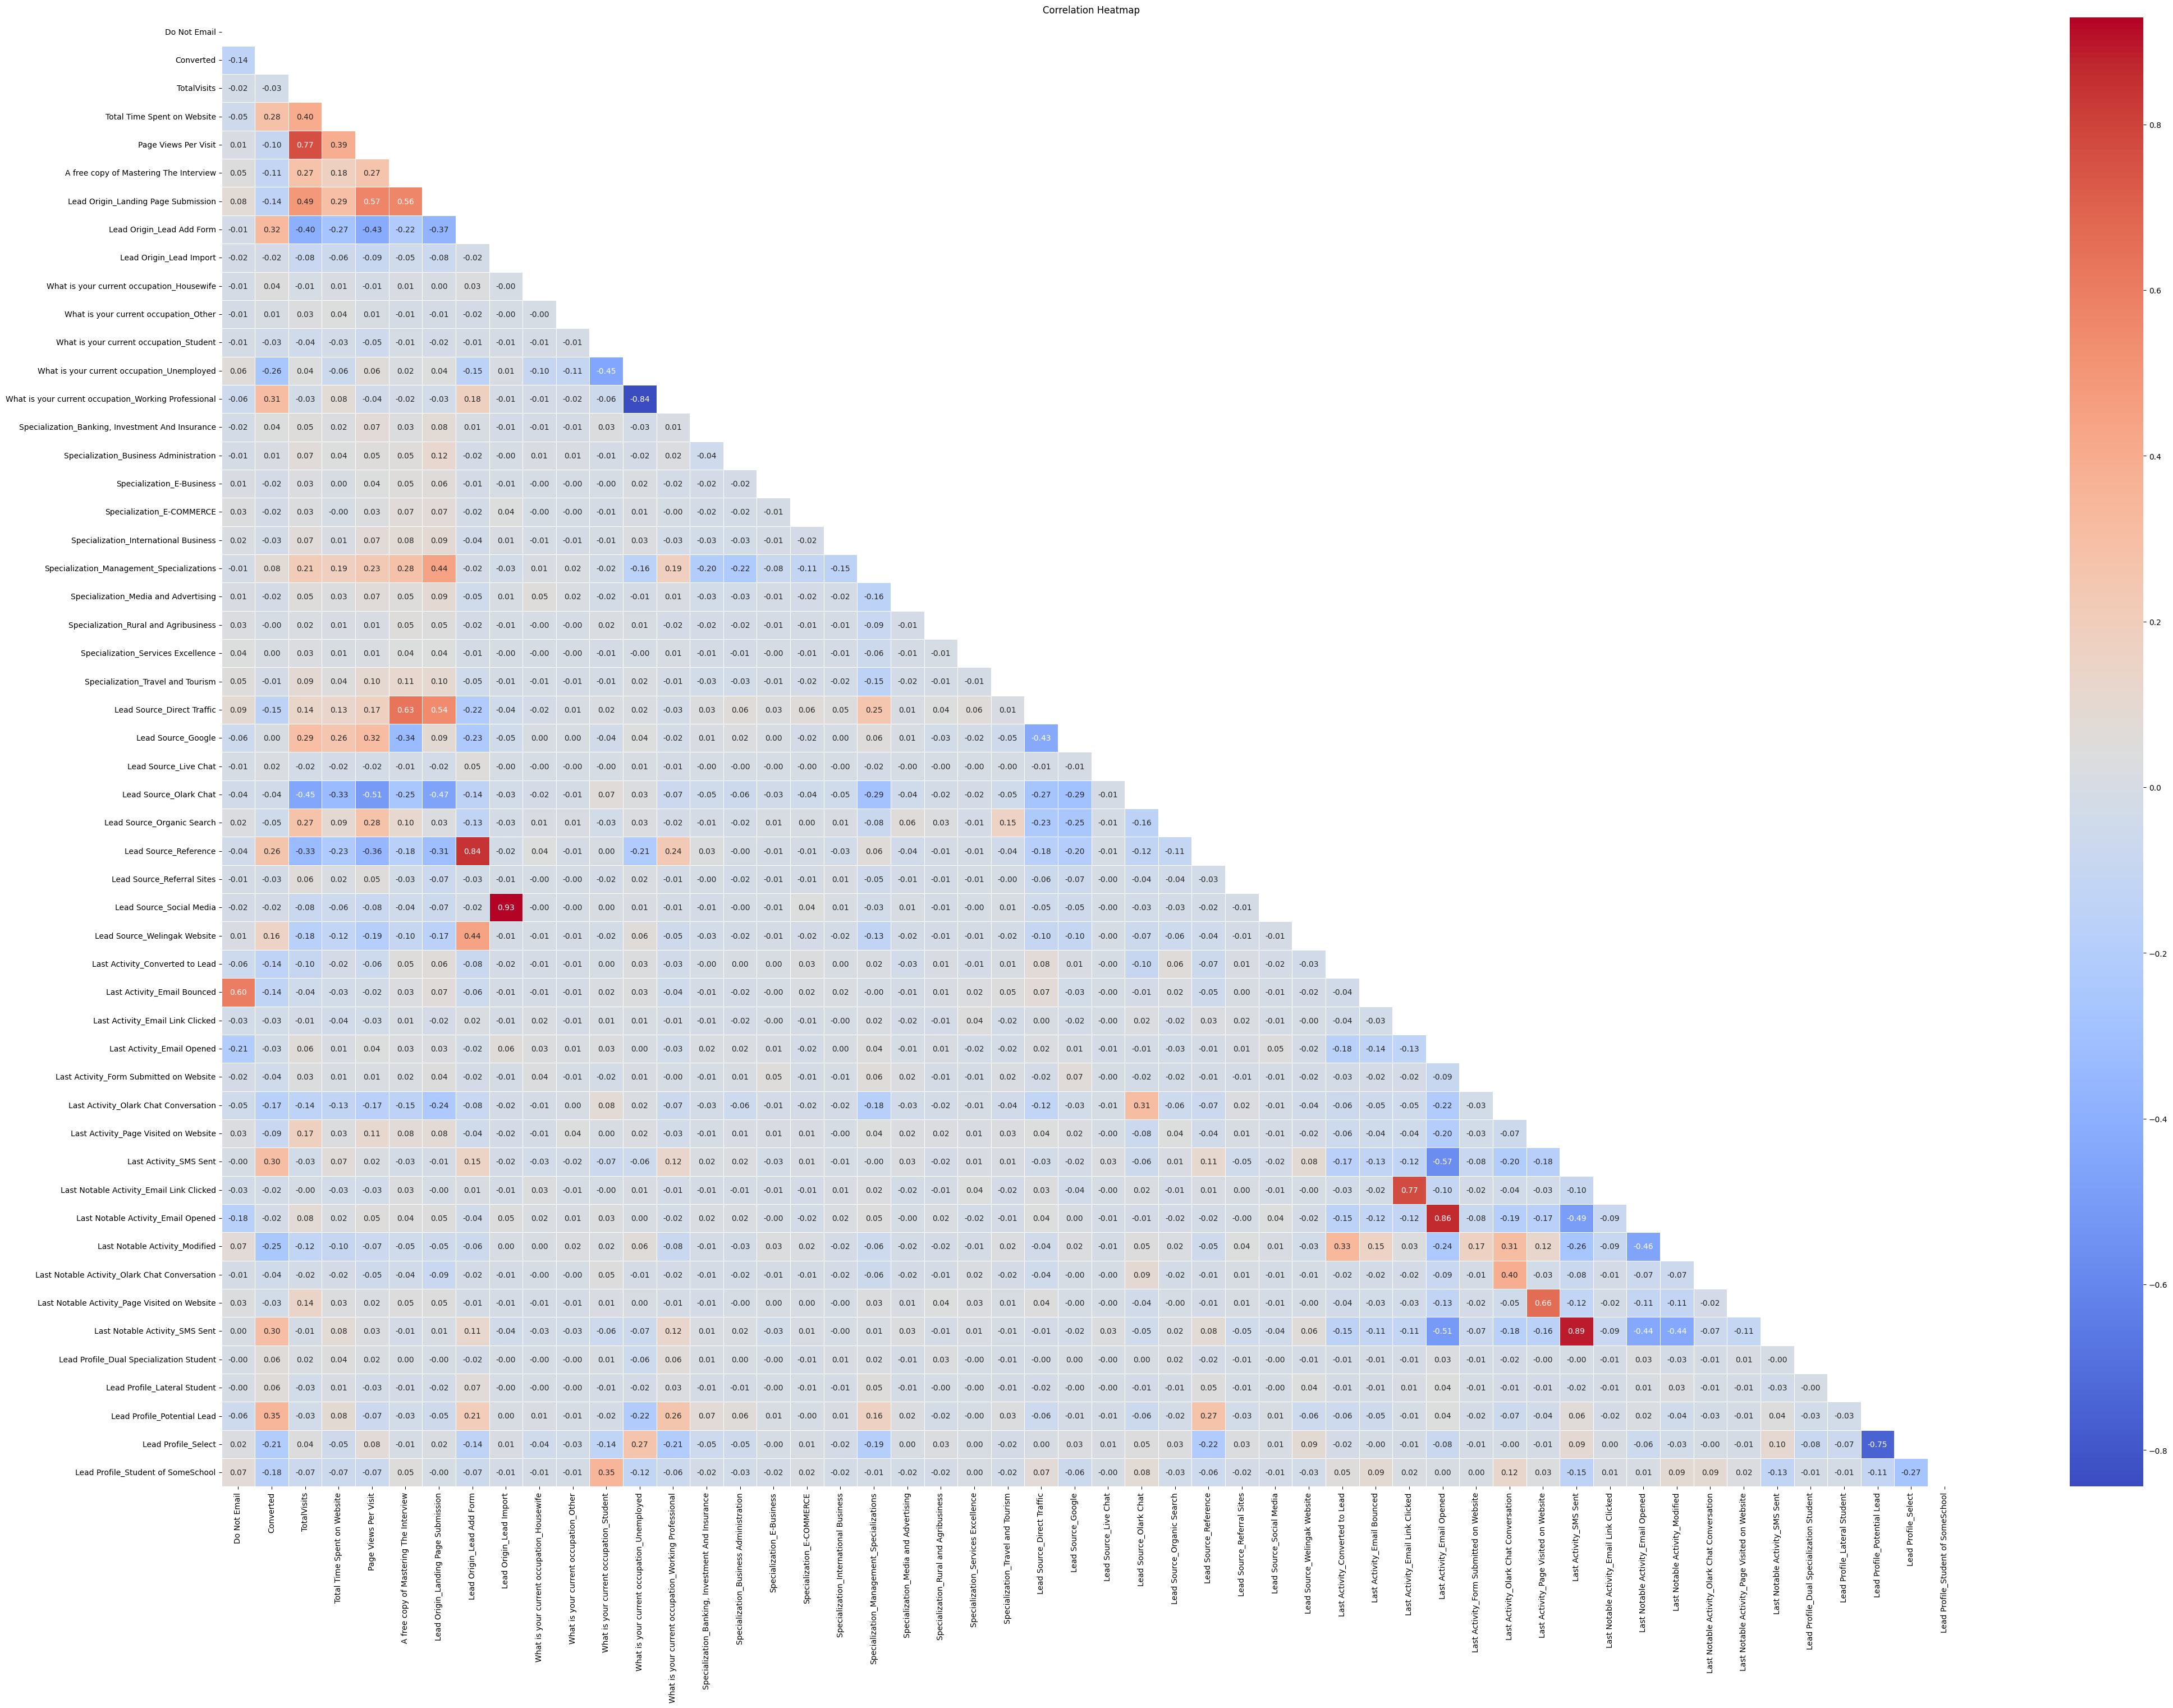

KeyError: ignored

In [270]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual variable name of your DataFrame

# Calculate correlation matrix
correlation_matrix = cleaned_data.corr()

# Create a mask to hide the upper triangle for better visualization
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(50, 34))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.title("Correlation Heatmap")
plt.show()

# Find the indices of the highest correlation values
max_corr_pairs = (correlation_matrix.abs().where(mask)
                  .stack()
                  .sort_values(ascending=False)
                  .drop_duplicates().index)

# Get the row and column indices with the highest correlation
row_index, col_index = max_corr_pairs[0]

# Drop the rows and columns with the highest correlation
cleaned_data = cleaned_data.drop(index=row_index[0], columns=col_index)

# Display the resulting DataFrame
print(cleaned_data)


In [273]:
# Columns to drop
columns_to_drop = ['Page Views Per Visit', 'Lead Source_Reference', 'Lead Source_Social Media']

# Drop the specified columns
cleaned_data = cleaned_data.drop(columns=columns_to_drop, errors='ignore')

# Display the resulting DataFrame
print(cleaned_data)

      Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0                0          0          0.0                            0   
1                0          0          5.0                          674   
2                0          1          2.0                         1532   
3                0          0          1.0                          305   
4                0          1          2.0                         1428   
...            ...        ...          ...                          ...   
9231             0          1          8.0                         1016   
9234             0          1          5.0                          210   
9236             0          0          2.0                          238   
9237             1          0          2.0                          199   
9239             0          1          6.0                         1279   

      A free copy of Mastering The Interview  \
0                                          0   
1  

In [274]:
cleaned_data.corr()

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.138056   
Converted                                              -0.138056   1.000000   
TotalVisits                                            -0.021823  -0.032876   
Total Time Spent on Website                            -0.051416   0.282950   
A free copy of Mastering The Interview                  0.048932  -0.110287   
Lead Origin_Landing Page Submission                     0.077141  -0.144675   
Lead Origin_Lead Add Form                              -0.014283   0.321717   
Lead Origin_Lead Import                                -0.018926  -0.018840   
What is your current occupation_Housewife              -0.010909   0.042616   
What is your current occupation_Other                  -0.012063   0.006806   
What is your current occupation_Student                -0.009986  -0.033988   
What is your current occupation_Unemployed              0.058049  -0.260313   
What is your current occupation_Working Profess...     -0.056583   0.308221   
Specialization_Banking, Investment And Insurance       -0.021025   0.035764   
Specialization_Business Administration                 -0.009723   0.011222   
Specialization_E-Business                               0.013275  -0.017305   
Specialization_E-COMMERCE                               0.028868  -0.016326   
Specialization_International Business                   0.019620  -0.025996   
Specialization_Management_Specializations              -0.007626   0.078223   
Specialization_Media and Advertising                    0.014419  -0.017763   
Specialization_Rural and Agribusiness                   0.025199  -0.002839   
Specialization_Services Excellence                      0.040763   0.000917   
Specialization_Travel and Tourism                       0.054132  -0.013463   
Lead Source_Direct Traffic                              0.087491  -0.147321   
Lead Source_Google                                     -0.055593   0.001216   
Lead Source_Live Chat                                  -0.005140   0.020077   
Lead Source_Olark Chat                                 -0.039862  -0.037377   
Lead Source_Organic Search                              0.022899  -0.047011   
Lead Source_Referral Sites                             -0.012073  -0.025228   
Lead Source_Welingak Website                            0.010101   0.157669   
Last Activity_Converted to Lead                        -0.058783  -0.138016   
Last Activity_Email Bounced                             0.598451  -0.135492   
Last Activity_Email Link Clicked                       -0.033796  -0.033371   
Last Activity_Email Opened                             -0.207135  -0.029131   
Last Activity_Form Submitted on Website                -0.018565  -0.043565   
Last Activity_Olark Chat Conversation                  -0.045003  -0.172576   
Last Activity_Page Visited on Website                   0.028366  -0.088120   
Last Activity_SMS Sent                                 -0.000814   0.303187   
Last Notable Activity_Email Link Clicked               -0.030499  -0.024744   
Last Notable Activity_Email Opened                     -0.178616  -0.016590   
Last Notable Activity_Modified                          0.073475  -0.245205   
Last Notable Activity_Olark Chat Conversation          -0.010173  -0.042791   
Last Notable Activity_Page Visited on Website           0.030024  -0.031041   
Last Notable Activity_SMS Sent                          0.001984   0.298706   
Lead Profile_Dual Specialization Student               -0.003034   0.060317   
Lead Profile_Lateral Student                           -0.001398   0.056857   
Lead Profile_Potential Lead                            -0.059428   0.347286   
Lead Profile_Select                                     0.024837  -0.212868   
Lead Profile_Student of SomeSchool                      0.071118  -0.177094   

                                                    TotalVisits  \
Do Not Email                      

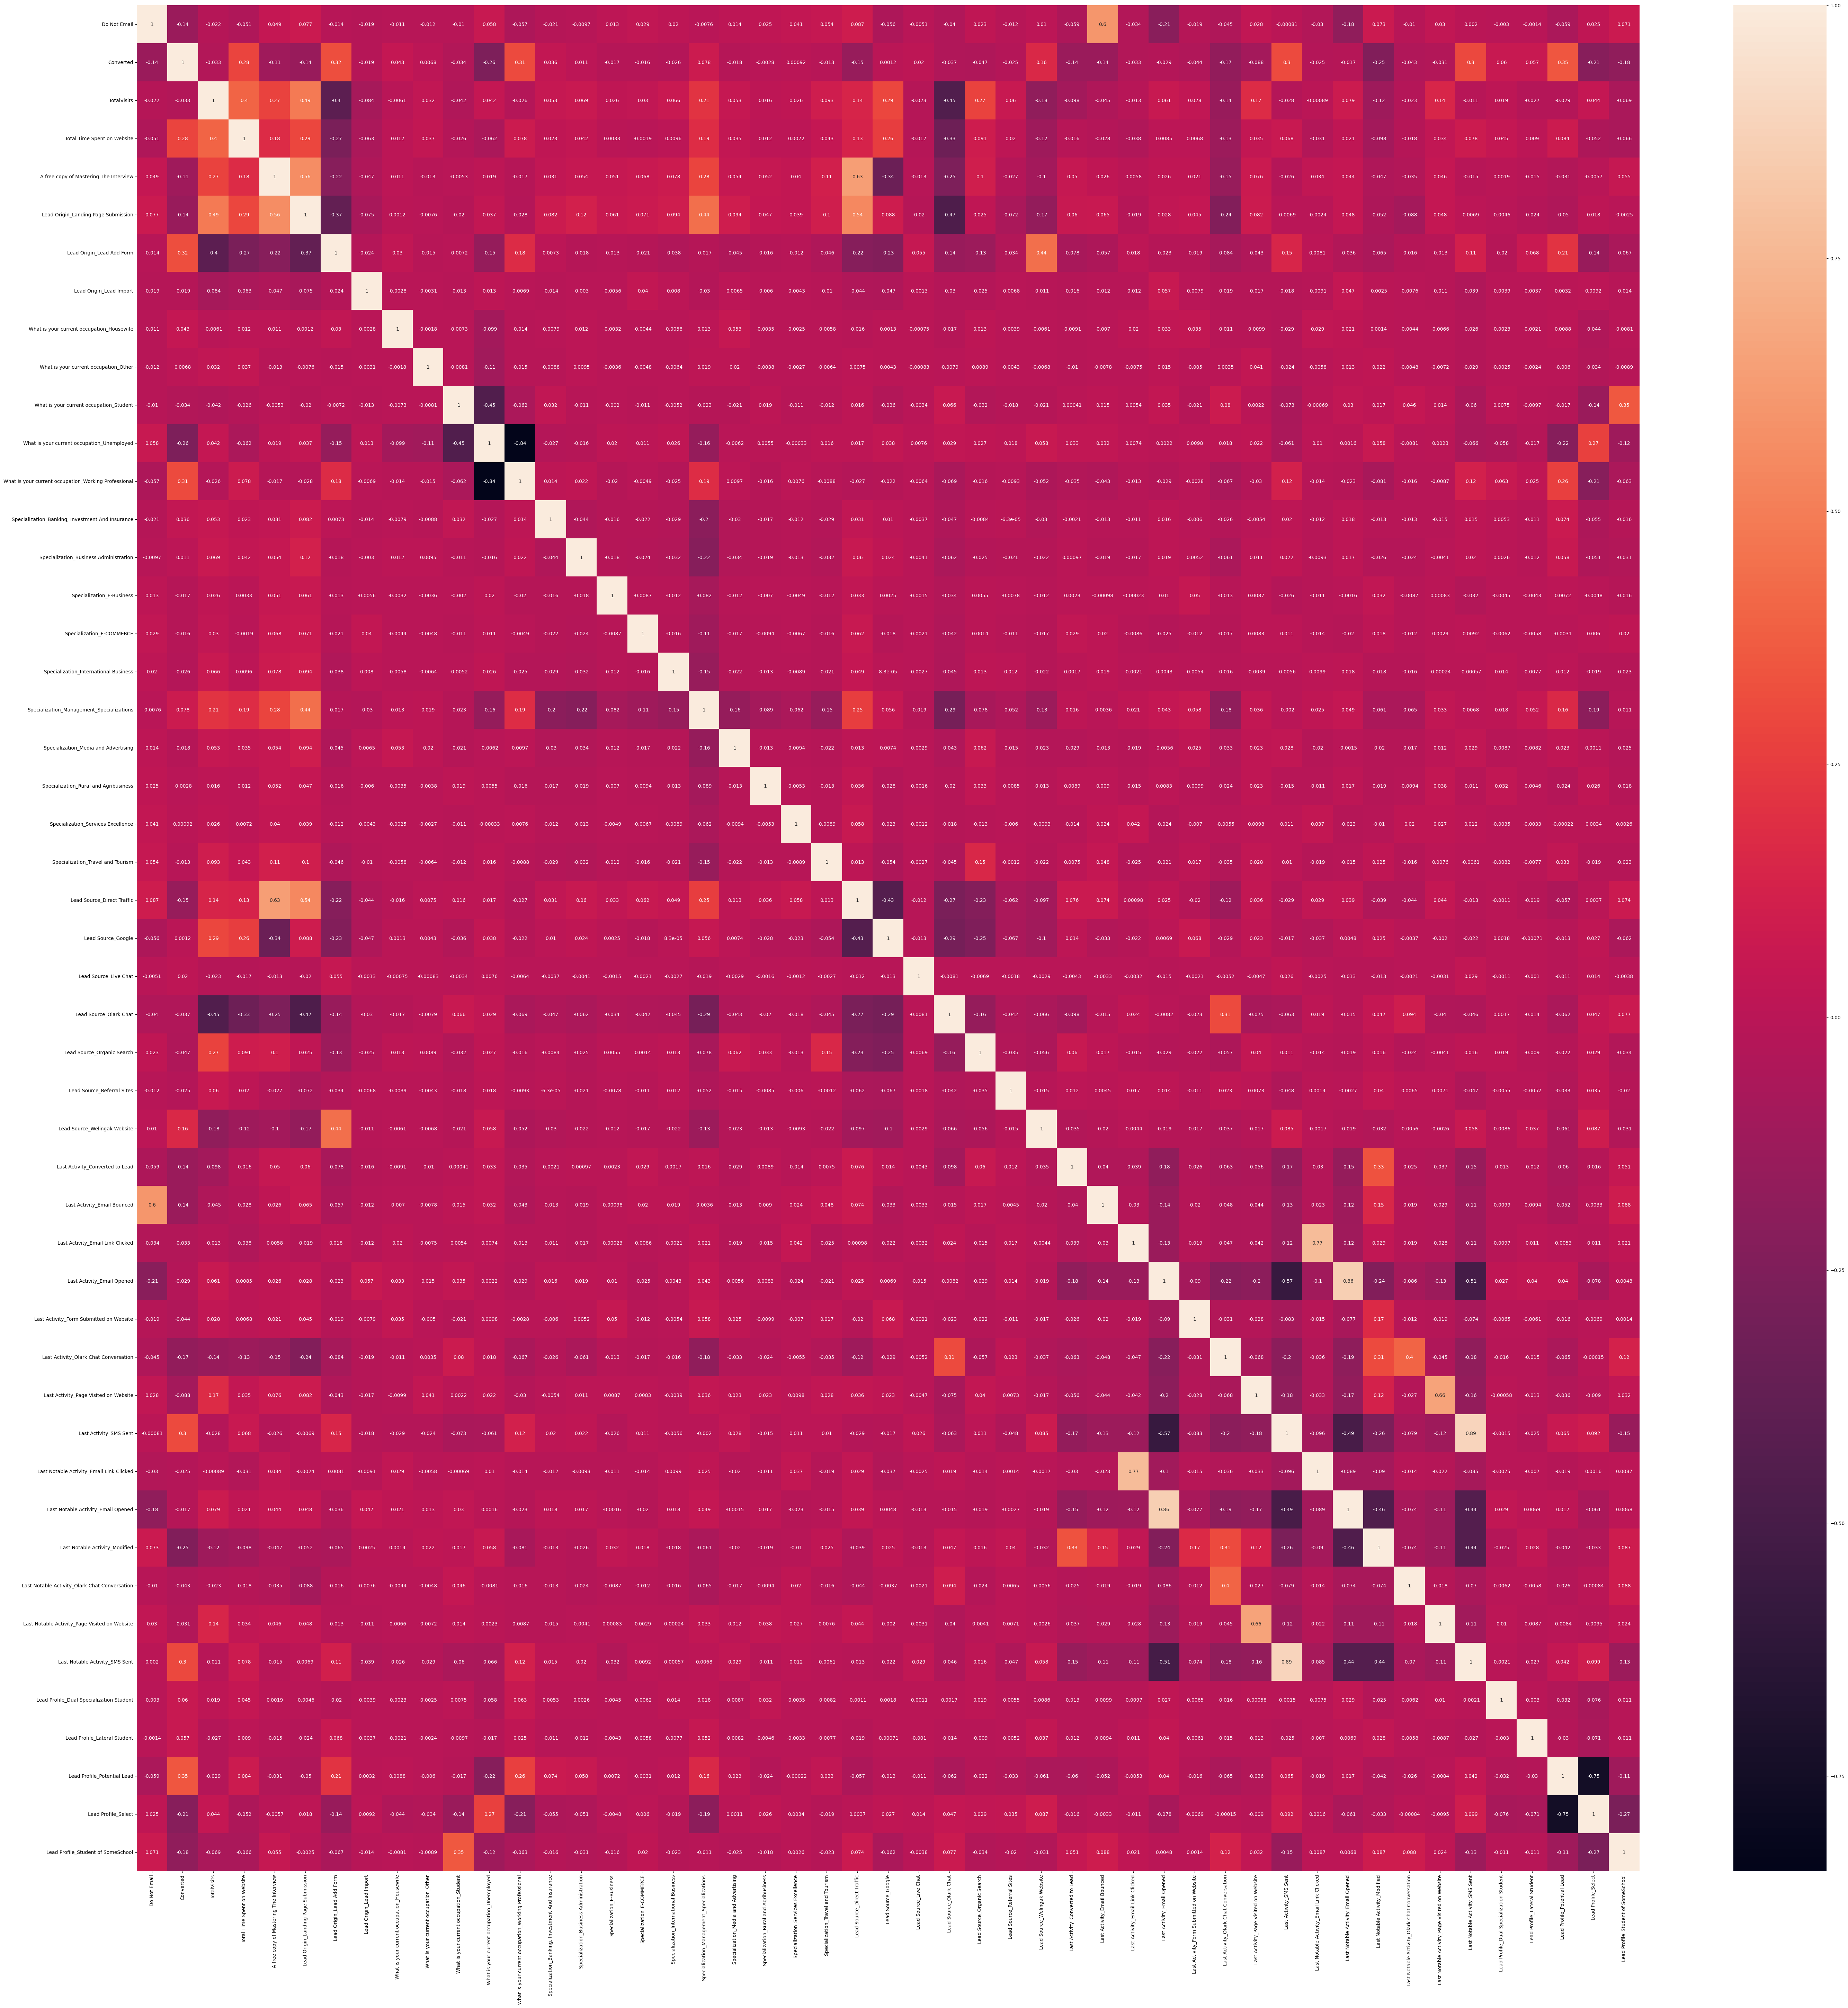

In [275]:
# Let's see the correlation matrix
plt.figure(figsize = (70,70))        # Size of the figure
sns.heatmap(cleaned_data.corr(),annot = True)
plt.show()


Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

In [276]:
import statsmodels.api as sm

In [277]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3938
Model:                            GLM   Df Residuals:                     3887
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.9
Date:                Wed, 20 Dec 2023   Deviance:                       3161.8
Time:                        17:31:27   Pearson chi2:                 4.03e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4398
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2766      2.120      0.602      0.547      -2.879       5.433
Do Not Email                                            -1.1777      0.257     -4.575      0.000      -1.682      -0.673
TotalVisits                                              0.3226      0.073      4.395      0.000       0.179       0.467
Total Time Spent on Website                              1.1364      0.055     20.806      0.000       1.029       1.243
Page Views Per Visit                                    -0.2154      0.082     -2.638      0.008      -0.375      -0.055
A free copy of Mastering The Interview                  -0.1316      0.144     -0.915      0.360      -0.413       0.150
Lead Origin_Landing Page Submission                     -0.3974      0.177     -2.239      0.025      -0.745      -0.050
Lead Origin_Lead Add Form                                1.2180      1.091      1.116      0.264      -0.920       3.356
Lead Origin_Lead Import                                 -1.3385      1.643     -0.815      0.415      -4.559       1.882
What is your current occupation_Housewife               25.3099   2.44e+04      0.001      0.999   -4.77e+04    4.78e+04
What is your current occupation_Other                    1.2475      1.982      0.629      0.529      -2.638       5.133
What is your current occupation_Student                  1.4614      1.842      0.793      0.428      -2.149       5.072
What is your current occupation_Unemployed               0.9992      1.823      0.548      0.584      -2.573       4.571
What is your current occupation_Working Professional     3.1972      1.832      1.745      0.081      -0.393       6.787
Specialization_Banking, Investment And Insurance         0.6096      0.286      2.128      0.033       0.048       1.171
Specialization_Business Administration                   0.0662      0.262      0.253      0.801      -0.447       0.579
Specialization_E-Business                                0.9866      0.617      1.598      0.110      -0.223       2.196
Specialization_E-COMMERCE                                0.4073      0.464      0.877      0.380      -0.502       1.317
Specialization_International Business                    0.1733      0.359      0.482      0.630      -0.531       0.878
Specialization_Management_Specializations                0.3176      0.169      1.883      0.060      -0.013       0.648
Specialization_Media and Advertising                    -0.3212      0.353     -0.909      0.363      -1.014       0.372
Specialization_Rural and Agribusiness                    0.5433      0.476      1.141      0.254      -0.390       1.477
Specialization_Services Excellence                       1

# Step 8: Feature Selection Using RFE

In [278]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [280]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Instantiate a logistic regression model
logreg = LogisticRegression()

# Create RFE model with 15 features
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE on training data
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [281]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False,  True,  True,  True, False,  True])

In [282]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 20),
 ('What is your current occupation_Student', False, 14),
 ('What is your current occupation_Unemployed', False, 10),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 18),
 ('Specialization_Business Administration', False, 35),
 ('Specialization_E-Business', False, 15),
 ('Specialization_E-COMMERCE', False, 22),
 ('Specialization_International Business', False, 30),
 ('Specialization_Management_Specializations', False, 23),
 ('Specialization_Media and Advertising', False, 11)

In [283]:
col = X_train.columns[rfe.support_]

In [284]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activit

In [285]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3938
Model:                            GLM   Df Residuals:                     3922
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1677.4
Date:                Wed, 20 Dec 2023   Deviance:                       3354.7
Time:                        17:32:49   Pearson chi2:                 4.07e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4117
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8019      0.065    -12.352      0.000      -0.929      -0.675
Do Not Email                                            -1.0823      0.201     -5.396      0.000      -1.475      -0.689
Total Time Spent on Website                              1.1344      0.052     22.007      0.000       1.033       1.235
Lead Origin_Lead Add Form                                3.6175      0.232     15.566      0.000       3.162       4.073
What is your current occupation_Housewife               23.5838   2.49e+04      0.001      0.999   -4.87e+04    4.87e+04
What is your current occupation_Working Professional     2.1673      0.198     10.959      0.000       1.780       2.555
Lead Source_Olark Chat                                   1.7878      0.130     13.777      0.000       1.533       2.042
Lead Source_Welingak Website                             2.9015      1.033      2.809      0.005       0.877       4.926
Last Activity_Olark Chat Conversation                   -1.1579      0.210     -5.510      0.000      -1.570      -0.746
Last Notable Activity_Email Link Clicked                -0.6829      0.321     -2.131      0.033      -1.311      -0.055
Last Notable Activity_Modified                          -0.9238      0.102     -9.067      0.000      -1.123      -0.724
Last Notable Activity_Page Visited on Website           -0.6982      0.288     -2.420      0.016      -1.264      -0.133
Lead Profile_Dual Specialization Student                23.2081   1.76e+04      0.001      0.999   -3.45e+04    3.45e+04
Lead Profile_Lateral Student                            22.5451   2.22e+04      0.001      0.999   -4.34e+04    4.34e+04
Lead Profile_Potential Lead                              1.4186      0.108     13.183      0.000       1.208       1.630
Lead Profile_Student of SomeSchool                      -2.3383      0.430     -5.443      0.000      -3.180      -1.496
========================================================================================================================
"""

In [286]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7659    0.007971
8945    0.330693
747     0.132289
5750    0.242001
3945    0.669376
1502    0.825153
5063    0.086607
1298    0.275712
4343    0.174030
4967    0.224028
dtype: float64

In [287]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00797066, 0.33069259, 0.13228945, 0.24200114, 0.66937614,
       0.82515315, 0.08660739, 0.27571165, 0.17402994, 0.22402752])

In [289]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0        0.007971         7659
1          0        0.330693         8945
2          1        0.132289          747
3          0        0.242001         5750
4          1        0.669376         3945

In [290]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted
0          0        0.007971         7659          0
1          0        0.330693         8945          0
2          1        0.132289          747          0
3          0        0.242001         5750          0
4          1        0.669376         3945          1

In [291]:
from sklearn import metrics

In [292]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1779  314]
 [ 498 1347]]


In [293]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7938039614017267


In [294]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [295]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                           Lead Origin_Lead Add Form  1.73
13                        Lead Profile_Potential Lead  1.39
5                              Lead Source_Olark Chat  1.38
9                      Last Notable Activity_Modified  1.36
7               Last Activity_Olark Chat Conversation  1.35
1                         Total Time Spent on Website  1.31
6                        Lead Source_Welingak Website  1.30
4   What is your current occupation_Working Profes...  1.25
0                                        Do Not Email  1.07
14                 Lead Profile_Student of SomeSchool  1.07
8            Last Notable Activity_Email Link Clicked  1.02
10      Last Notable Activity_Page Visited on Website  1.02
11           Lead Profile_Dual Specialization Student  1.02
3           What is your current occupation_Housewife  1.01
12                       Lead Profile_Lateral Student  1.01

In [296]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [297]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7300813008130081

In [298]:
# Let us calculate specificity
TN / float(TN+FP)

0.849976110845676

In [299]:
# Calculate false postive rate - predicting converted
print(FP/ float(TN+FP))

0.15002388915432394


In [300]:
# positive predictive value
print (TP / float(TP+FP))

0.810957254665864


In [301]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7812911725955204


In [302]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [304]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

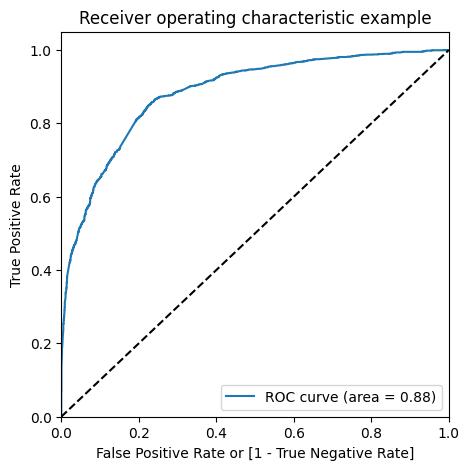

In [306]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [308]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.007971         7659          0    1    0    0    0    0   
1          0        0.330693         8945          0    1    1    1    1    0   
2          1        0.132289          747          0    1    1    0    0    0   
3          0        0.242001         5750          0    1    1    1    0    0   
4          1        0.669376         3945          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    1    0    0    0

In [310]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.468512  1.000000  0.000000
0.1   0.1  0.605383  0.981030  0.274247
0.2   0.2  0.733875  0.938753  0.553273
0.3   0.3  0.790249  0.881843  0.709508
0.4   0.4  0.809040  0.851491  0.771620
0.5   0.5  0.793804  0.730081  0.849976
0.6   0.6  0.786694  0.675881  0.884376
0.7   0.7  0.769934  0.594038  0.924988
0.8   0.8  0.736160  0.482385  0.959866
0.9   0.9  0.681310  0.332249  0.989011


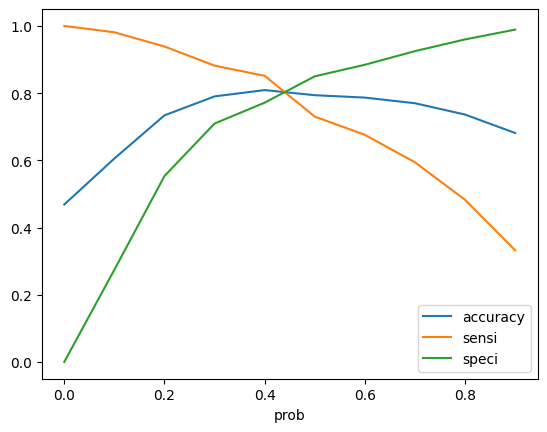

In [311]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [313]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.007971         7659          0    1    0    0    0    0   
1          0        0.330693         8945          0    1    1    1    1    0   
2          1        0.132289          747          0    1    1    0    0    0   
3          0        0.242001         5750          0    1    1    1    0    0   
4          1        0.669376         3945          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    1    1    0    0    0                1

In [314]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7902488572879635

In [316]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1485,  608],
       [ 218, 1627]])

In [317]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [318]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8818428184281842

In [319]:
# Let us calculate specificity
TN / float(TN+FP)

0.7095078834209269

In [320]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2904921165790731


In [321]:
# Positive predictive value
print (TP / float(TP+FP))

0.7279642058165549


In [322]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8719906048150323


Precision and Recall

In [323]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1779,  314],
       [ 498, 1347]])

Precision
TP / TP + FP

In [324]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.810957254665864

Recall
TP / TP + FN

In [325]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7300813008130081

Using sklearn utilities for the same

In [326]:
from sklearn.metrics import precision_score, recall_score

In [327]:
?precision_score

In [328]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.810957254665864

In [329]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7300813008130081

### Precision and recall tradeoff

In [330]:
from sklearn.metrics import precision_recall_curve

In [332]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       1
        ..
 3933    1
 3934    0
 3935    1
 3936    0
 3937    0
 Name: Converted, Length: 3938, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 3933    0
 3934    0
 3935    0
 3936    0
 3937    0
 Name: predicted, Length: 3938, dtype: int64)

In [336]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

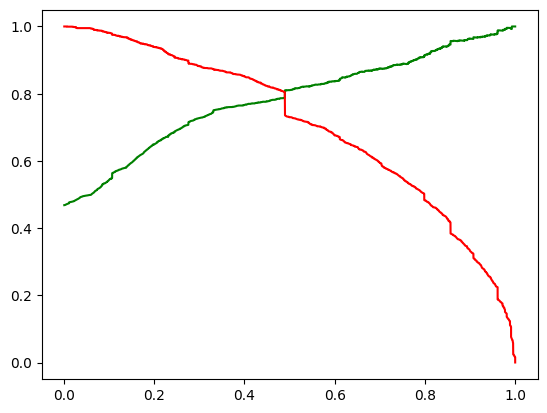

In [337]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
Step 11: Making predictions on the test set

Step 11: Making predictions on the test set

In [338]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [339]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
3972             0                     0.010116                          0   
7414             0                    -0.913949                          0   
1637             0                    -0.913949                          0   
3230             0                    -0.913949                          0   
4819             0                    -0.425688                          0   

      What is your current occupation_Housewife  \
3972                                          0   
7414                                          0   
1637                                          0   
3230                                          0   
4819                                          0   

      What is your current occupation_Working Professional  \
3972                                                  0      
7414                                                  0      
1637                                                  0      
3230                                                  0      
4819                                                  0      

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
3972                       0                             0   
7414                       1                             0   
1637                       0                             0   
3230                       1                             0   
4819                       0                             0   

      Last Activity_Olark Chat Conversation  \
3972                                      0   
7414                                      0   
1637                                      0   
3230                                      0   
4819                                      0   

      Last Notable Activity_Email Link Clicked  \
3972                                         0   
7414                                         0   
1637                                         0   
3230                                         0   
4819                                         0   

      Last Notable Activity_Modified  \
3972                               1   
7414                               1   
1637                               0   
3230                               0   
4819                               0   

      Last Notable Activity_Page Visited on Website  \
3972                                              0   
7414                                              0   
1637                                              0   
3230                                              0   
4819                                              1   

      Lead Profile_Dual Specialization Student  Lead Profile_Lateral Student  \
3972                                         0                             0   
7414                                         0                             0   
1637                                         0                             0   
3230                                         0                             0   
4819                                         0                             0   

      Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  
3972                            0                                   0  
7414                            0                                   1  
1637                            1                                   0  
3230                            0                                   0  
4819                            0                                   0

In [340]:
X_test_sm = sm.add_constant(X_test)

In [341]:
y_test_pred = res.predict(X_test_sm)

In [342]:
y_test_pred[:10]

3972    0.152610
7414    0.035127
1637    0.396493
3230    0.487272
4819    0.120989
8698    0.425506
2913    0.906670
5962    0.559023
2509    0.599715
2054    0.149542
dtype: float64

In [343]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [344]:
# Let's see the head
y_pred_1.head()

0
3972  0.152610
7414  0.035127
1637  0.396493
3230  0.487272
4819  0.120989

In [345]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [352]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [353]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [354]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [355]:
y_pred_final.head()

Converted  CustID  Prospect ID         0
0          0    3972            0  0.152610
1          0    7414            1  0.035127
2          1    1637            2  0.396493
3          1    3230            3  0.487272
4          1    4819            4  0.120989

In [351]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [356]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

AttributeError: ignored

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)